<a href="https://colab.research.google.com/github/Nilaydhage/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name - Airline Passenger Referral Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
#### **Name** - Nilay Dhage


# **Project Summary -**

The airline industry is highly competitive, and airlines need to provide an excellent customer experience to stay ahead in the market. One of the ways airlines measure customer satisfaction is by asking passengers whether they would recommend the airline to their friends. Positive recommendations can attract new customers, while negative ones can hurt an airline's reputation and lead to a loss of business. Hence, it is essential for airlines to predict whether passengers are likely to recommend them to their friends.

This project aims to predict whether passengers will recommend an airline to their friends using machine learning techniques. The project uses a dataset provided by the airline that includes information such as flight details, traveller type, and cabin type, along with whether the passenger recommends the airline or not. The project follows a data-driven approach by performing various steps such as data wrangling, EDA, feature engineering, and building several machine learning models.

In the data wrangling stage, the project removes duplicates and examines the dataset's variables to get an understanding of the data. In the EDA stage, the project uses 16 different visualizations to explore the data further. These visualizations help identify patterns and correlations between variables, providing insights into the data. The project then uses feature engineering techniques such as handling missing values using techniques like knn imputer and ffill and dropping unwanted columns. Categorical encoding is done by creating dummy columns for 'traveller_type' and 'cabin' variables. The data is then split into training and testing sets to build predictive models.

The project builds several machine learning models to predict whether passengers will recommend the airline to their friends. These models include logistic regression, decision trees classifier, random forest classifier, K-nearest-neighbour model, naive bayes, support vector machine, and XGBoost. Among these models, the XGBoost model performs the best in terms of accuracy and is chosen as the final prediction model for this project.

It is essential to note that the choice of the best model can depend on various factors such as model interpretability, ease of implementation, and computational efficiency. Nevertheless, the XGBoost model has performed well in terms of accuracy and has met the project's objective of predicting whether passengers will recommend the airline to their friends or not.

Overall, this project demonstrates the use of various machine learning techniques in solving a real-world business problem. By predicting whether passengers will recommend the airline to their friends, airlines can take proactive steps to improve customer experience and increase positive recommendations, leading to more business. This project highlights the importance of data-driven decision-making in the airline industry and provides insights into how machine learning techniques can help solve real-world business problems.

# **GitHub Link -**

# **Problem Statement**


**Data includes airlines reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict weather passengers will refer the airline to their friends.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [112]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb

In [113]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [114]:
airline_df = pd.read_excel('/content/data_airline_reviews (1).xlsx')


### Dataset First View

In [115]:
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
airline_df.shape

(131895, 17)

In [117]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [118]:
airlines_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

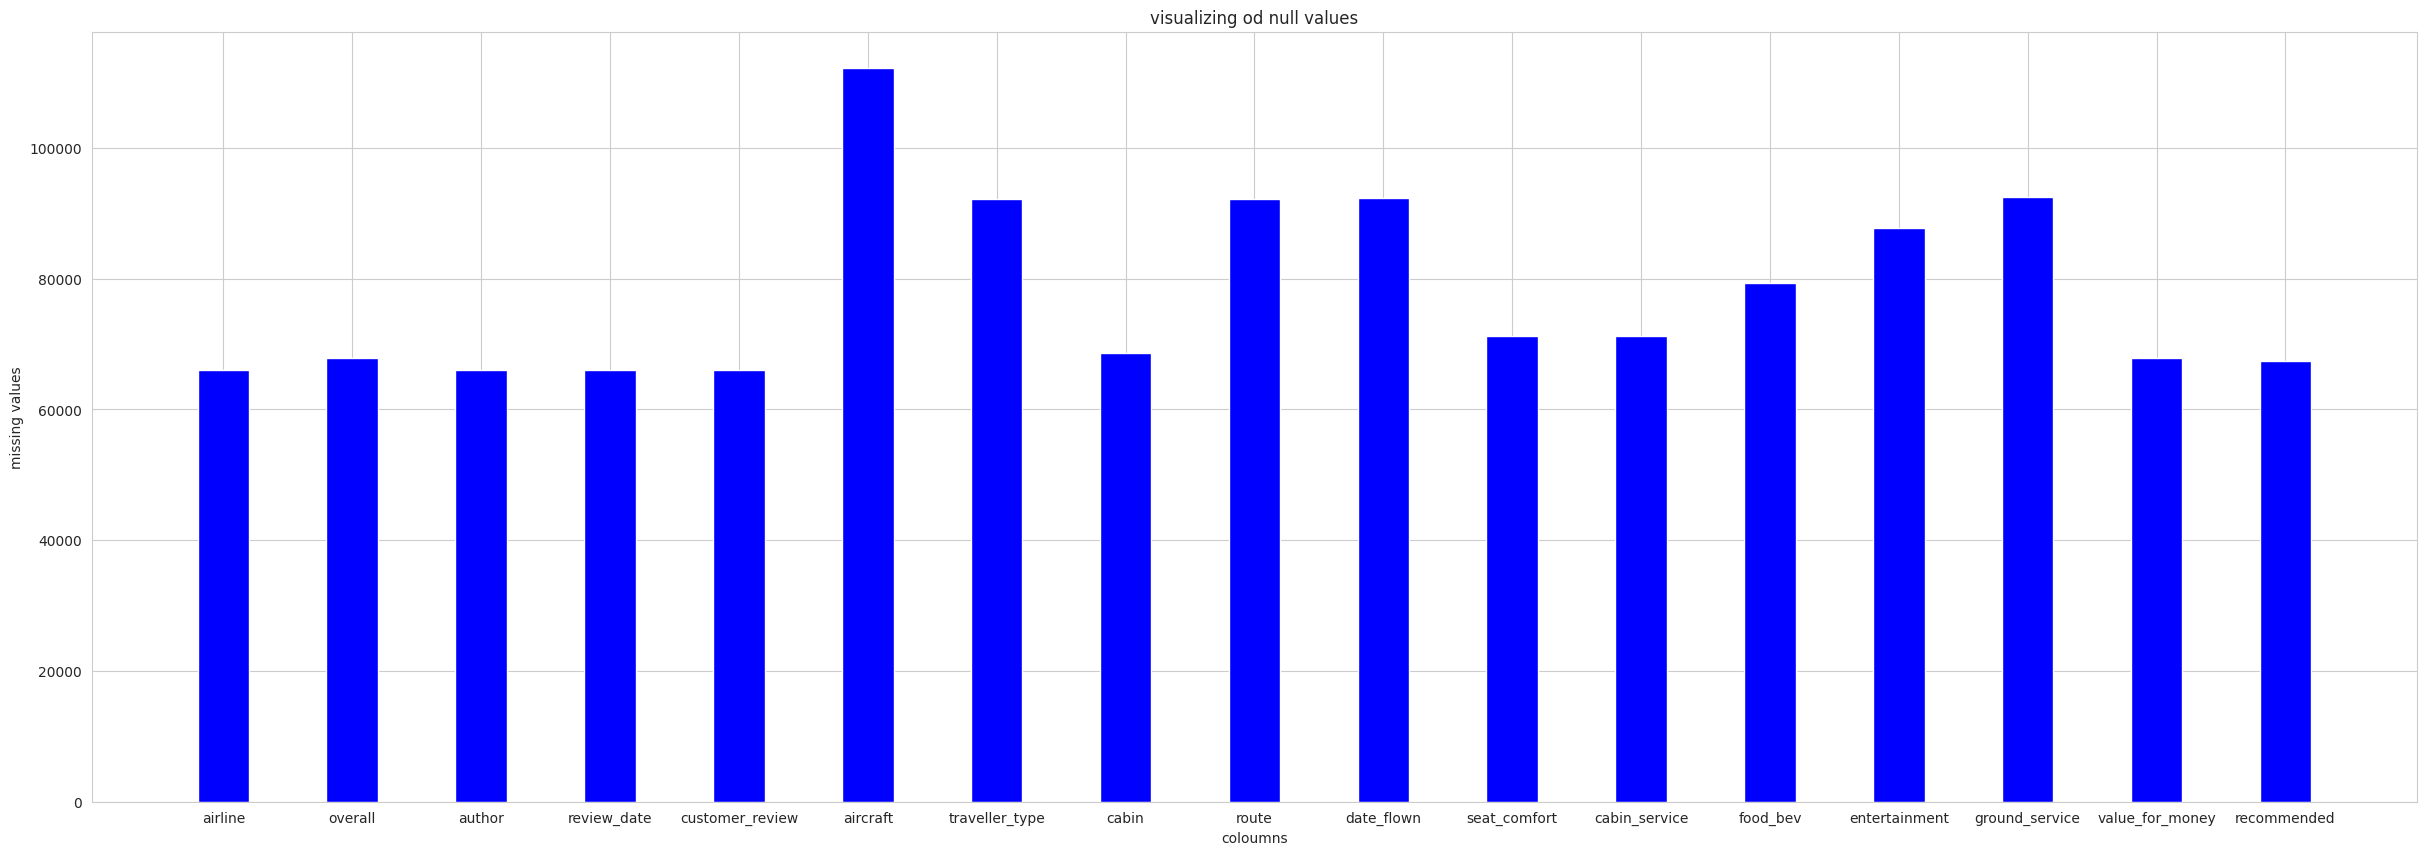

In [119]:
courses=list(airline_df.columns)
values= list(airline_df.isnull().sum())
fig= plt.figure(figsize=(30,10))
plt.bar(courses,values,color='blue',width=0.4)
plt.xlabel("coloumns")
plt.ylabel("missing values")
plt.title("visualizing od null values")
plt.show()

### What did you know about your dataset?

The dataset has around 131895 rows and 17 columns. The data is in such form that after each row there is a blank row. Apart from that there many NaN values in each variable and there might be duplicate rows. We need to clean this data in order to make it ready for Exploratory Data Analysis.

## ***2. Understanding Your Variables***

In [120]:
#dataset columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [121]:
#dataset describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description


1.  **airline:** Name of the airline.
2.  **overall:** Overall points are given to the trip between 0 & 10.
3.  **author:** Author of the trip
4.  **review_date:** Date of the Review
5.  **customer_review:** Reviews given by customers about the flight experience.
6.  **aircraft:** Type of the aircraft
7.  **traveller_type:** Type of traveler (e.g. business, leisure)
8.  **cabin:** Cabin type (e.g. Economy Class, Business Class, Premium Economy or First Class)
9.  **route:** The travel from and to destination of the customer.
10. **date_flown:** Date of the flight
11. **seat_comfort:** Rated between 1-5
12. **cabin_service:** Rated between 1-5
13. **food_bev:** Rated between 1-5
14. **entertainment:** Rated between 1-5
15. **ground_service:** Rated between 1-5
16. **value_for_money:** Rated between 1-5
17. **recommended:** Referred to friend(Yes or No)

## 3. ***Data Wrangling***

In [122]:
# Make Dataset ready for EDA
airline_df.duplicated().sum()

70711

In [123]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [124]:
airline_df.isnull().sum()


airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [125]:
# Unique value counts for each variable
for column in airline_df.columns:
    print(f"{column}: {airline_df[column].nunique()}")

airline: 81
overall: 10
author: 44069
review_date: 3015
customer_review: 61172
aircraft: 2088
traveller_type: 4
cabin: 4
route: 24549
date_flown: 63
seat_comfort: 5
cabin_service: 5
food_bev: 5
entertainment: 5
ground_service: 5
value_for_money: 5
recommended: 2


In [126]:
# Dropping unwanted columns
airline_df.drop(columns=['aircraft','route','author','customer_review'],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [127]:
top_10_airlines = airline_df['airline'].value_counts().head(10)
top_10_airlines = top_10_airlines.reset_index()
top_10_airlines.columns = ['airline', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Spirit Airlines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'British Airways'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'China Southern Airlines'),
  Text(6, 0, 'Frontier Airlines'),
  Text(7, 0, 'Ryanair'),
  Text(8, 0, 'Delta Air Lines'),
  Text(9, 0, 'Turkish Airlines')])

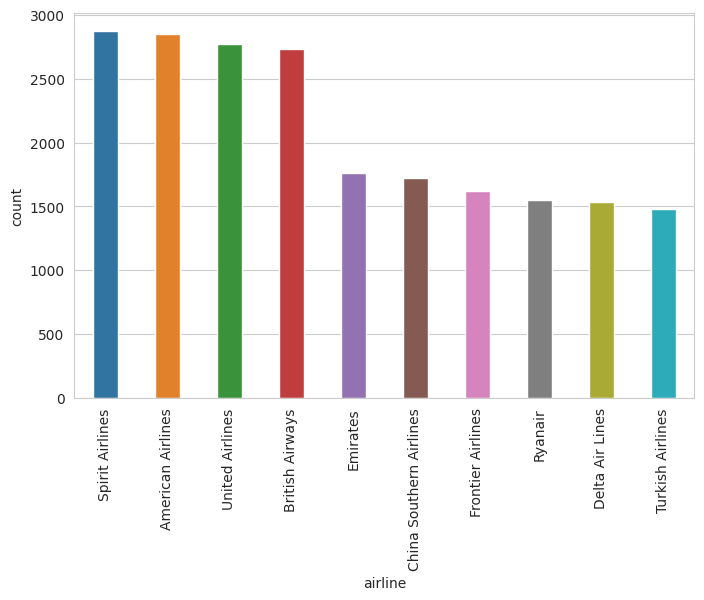

In [128]:
# Chart - 1 visualization code
plt.subplots(figsize=(8, 5))
sns.barplot(x='airline', y='count', data=top_10_airlines, width = 0.4)
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar plots are simple and intuitive, making them easy to understand for people with different levels of expertise. Here, the bars represent count of each airline in  airline column. By using barplots we got the better visualisation of airlines.

##### 2. What is/are the insight(s) found from the chart?

1. 'Spirit Airlines' and 'American Airlines' are the most used airline by the travellers to travel followed by 'United Airlines' and 'British Airways'. These 4 airlines are the top most airlines preferred by the travellers.
2. Other than those 4 top airlines, 'Emirates','China Southern Airlines','Frontier Airlines','Ryanair', etc are the most preferred airlines. We have plotted the bar graph for top 10 airlines in the datset provided.

#### Chart - 2

In [129]:
airline_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

<Axes: xlabel='recommended', ylabel='count'>

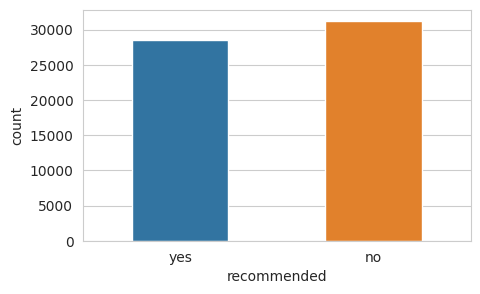

In [130]:
# Chart - 2 visualization code
plt.subplots(figsize=(5, 3))
sns.countplot(x='recommended', data=airline_df, width = 0.5)

##### 1. Why did you pick the specific chart?

 countplots are a simple, efficient, and versatile tool for visualizing the frequency or count of categories in a dataset, they are one of the most useful choice for many applications, including exploratory data analysis and data communication.

##### 2. What is/are the insight(s) found from the chart?

In the count plot above, we found the count plots of the 2 categorical values for the categorical column 'recommended'. The insights we can draws is that the count for people referred their friend about the flight is less than not referred.


#### Chart - 3

In [131]:
airline_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

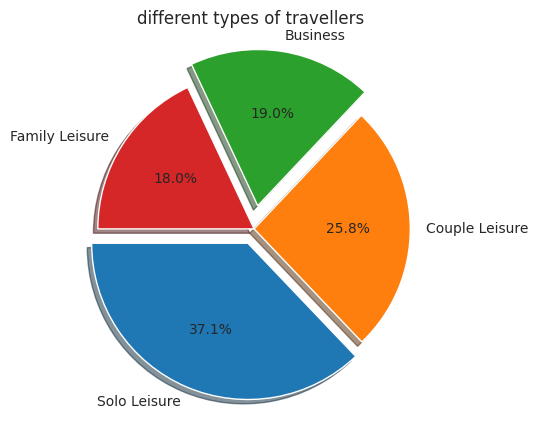

In [132]:
# Chart - 3 visualization code
labels = 'Solo Leisure' , 'Couple Leisure' , 'Business' , 'Family Leisure'
sizes = airline_df.traveller_type.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("different types of travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly used to represent categorical data or proportions, and they can be useful for visualizing data in a simple and intuitive way. Each slice of the pie chart represents a category or value, and the size of the slice is proportional to the percentage or frequency of that category or value.

##### 2. What is/are the insight(s) found from the chart?

1. The pie chart shows that 'Solo Leisure' travellers make up the largest proportion of travellers at 37.1%. This suggests that people are more likely to travel alone for leisure purposes than with others.
2. The second most common category is 'Couple Leisure' travellers, representing 25.8% of travellers. This suggests that travelling as a couple is also a popular choice for leisure travel.
3. Although 'Business' travellers only represent 19.0% of the total, this is still a significant proportion of travellers. This suggests that business travel is still an important aspect of the travel industry.
4. 'Family Leisure'is representing 18.0% of travellers the smallest among all, this still suggests that family travel is an important aspect of the travel industry.

#### Chart - 4

<Axes: xlabel='traveller_type', ylabel='count'>

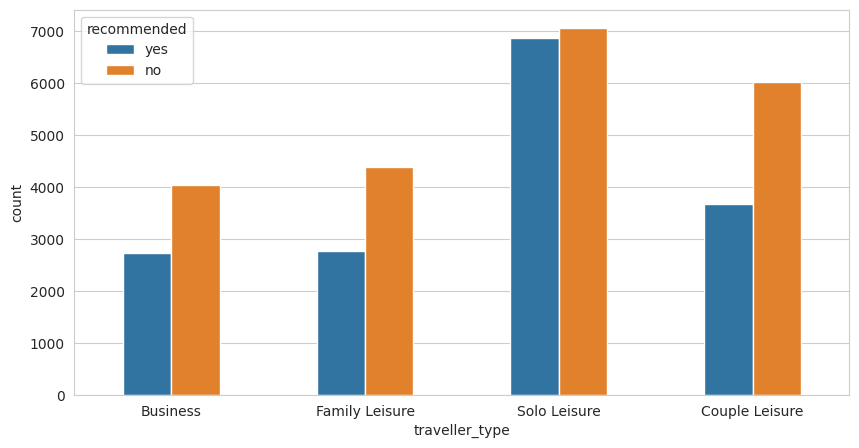

In [133]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['traveller_type'],hue=airline_df['recommended'], width = 0.5)

##### 1. Why did you pick the specific chart?

Countplots are a useful tool for visualizing categorical data because they are easy to interpret and provide a quick overview of the distribution of the data. They are especially useful for identifying patterns and trends in the data and can be used to compare the frequency of different categories or values.

##### 2. What is/are the insight(s) found from the chart?

If we compare the ratio of recommended Yes and No in all the 4 types of travellers, we found that most of them have not recommended to their friend. Their is a big difference between Yes and No in the type business, family leisure and couple leisure and majority is No. In the type solo leisure, although majority is No but there is very less difference between Yes and No.

#### Chart - 5

In [134]:
airline_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

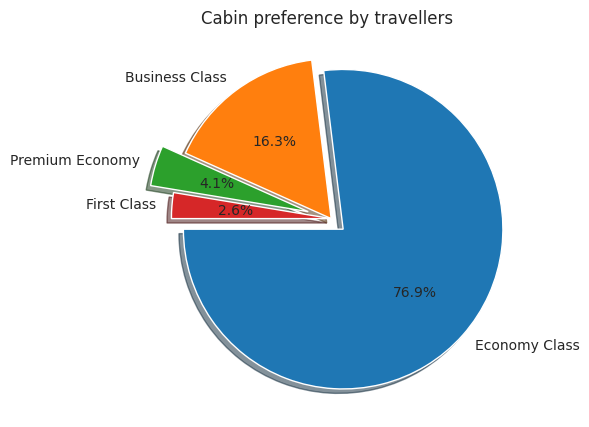

In [135]:
# Chart - 5 visualization code
labels = 'Economy Class' , 'Business Class' , 'Premium Economy' , 'First Class'
sizes = airline_df.cabin.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Cabin preference by travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly used to represent categorical data or proportions, and they can be useful for visualizing data in a simple and intuitive way. Each slice of the pie chart represents a category or value, and the size of the slice is proportional to the percentage or frequency of that category or value.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of passengers on the flight belong to the 'Economy Class' cabin, accounting for 76.9% of the total passengers. This suggests that the flight's target market is mainly budget-conscious travelers who are looking for a cost-effective mode of transportation.
2. Only a small percentage of passengers were classified as 'Business Class' (16.3%), 'Premium Economy' (4.1%), or 'First Class' (2.6%). This could imply that the flight's customer base is predominantly composed of leisure travelers who are not looking for luxury travel amenities.

#### Chart - 6

<Axes: xlabel='cabin', ylabel='count'>

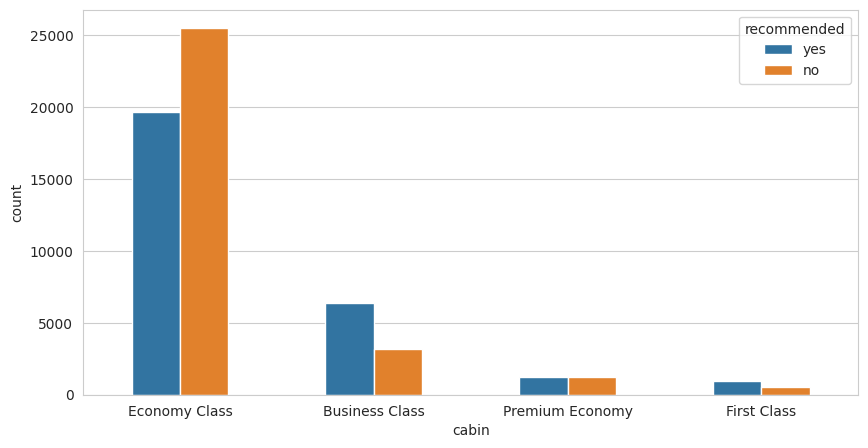

In [136]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'], width = 0.5)

##### 1. Why did you pick the specific chart?

Countplots are a useful tool for visualizing categorical data because they are easy to interpret and provide a quick overview of the distribution of the data. They are especially useful for identifying patterns and trends in the data and can be used to compare the frequency of different categories or values.

##### 2. What is/are the insight(s) found from the chart?

1. For economy Class, majority is No which shows that majority of travellers are not satified with the amenities in the economy class.
2. In business clss, majority is Yes which shows that there are good amenities in the business class and if you want good facilities you have to spend more and buy a business class ticket.
3. for premium economy and first class which are the least preferred class among all, the most of the travellers are satisfied with the facilty and service. They have a slightly better Yes and No ratio as compared to economy class.

#### Chart - 7

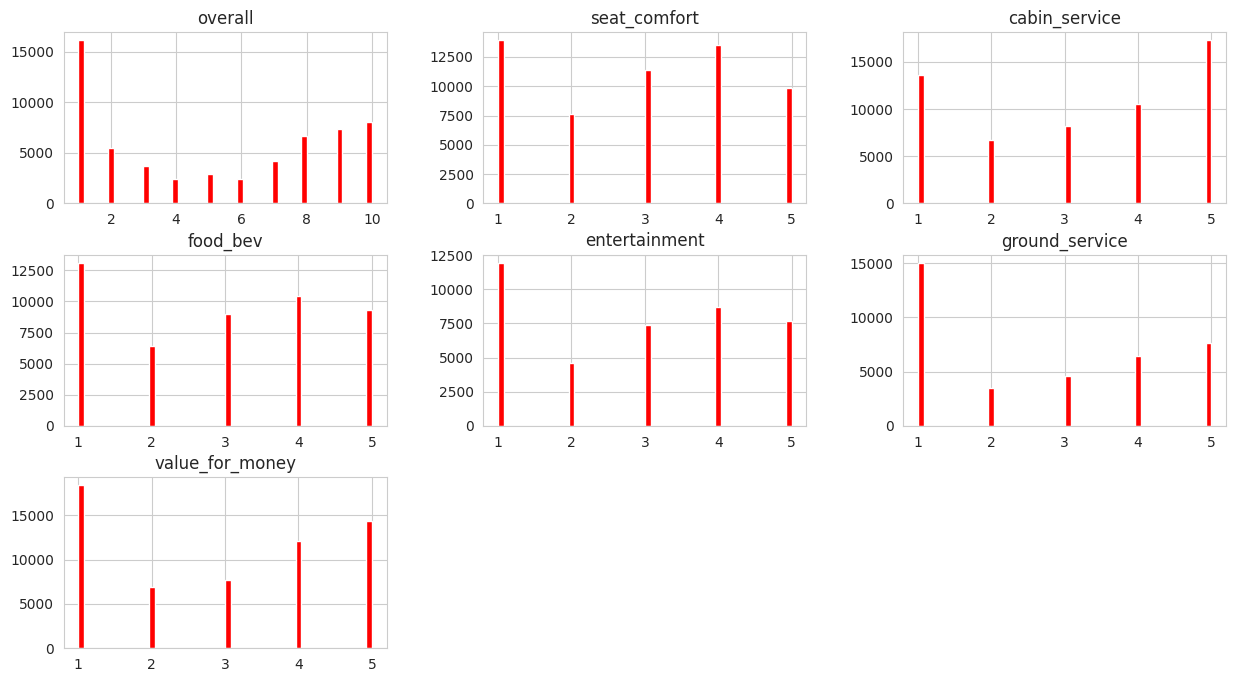

In [137]:
# Chart - 7 visualization code
airline_df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are commonly used to display the distribution of a numerical variable. Each bar on the histogram represents a range of values, called a bin, and the height of the bar represents the number of observations within that bin. By specifying the number of bins, we can control the level of granularity in the visualization. Here, the histogram is created with 50 bins and a size of 15x8 inches, with bars colored red. The plt.show() function is used to display the chart.

##### 2. What is/are the insight(s) found from the chart?

This chart shows us the rating given by travellers of different amenities in the flight. Majority of the customers have given a rating of 1 which tells that they are not satisfied with the service. Although many gave the rating of 4 and 5 which shows that they were satisfied with the amenities and serive of the flight. Overall, from this chart we can draw conclusion that how many travellers were satisfied with the flight amenities and services.

#### Chart - 9 - Correlation Heatmap

<Axes: >

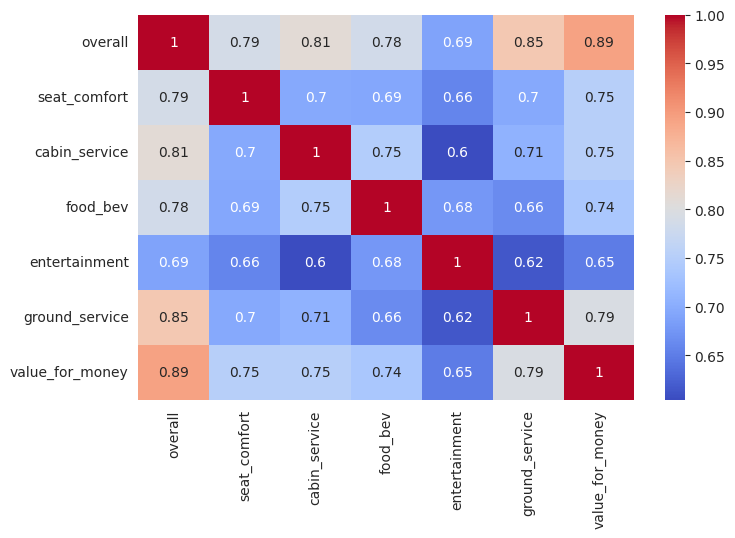

In [138]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
correlation = airline_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

The "correlation = airline_df.corr()" function is calculating the correlation between all the variables in the "airline_df". The resulting correlation matrix is stored in the "correlation" variable. The "sns.heatmap" function is creating the heatmap. The "abs(correlation)" parameter is passed to the function to ensure that all the correlations are positive. The "annot=True" parameter is used to show the numerical values of the correlation coefficients in each cell of the heatmap. The "cmap='coolwarm'" parameter is used to set the color map for the heatmap.

##### 2. What is/are the insight(s) found from the chart?

1. The correlation heatmap provides a visual representation of the strength and direction of the correlation between variables. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue. A darker shade indicates a stronger correlation.

2. Correlation heatmaps can help identify multicollinearity, which is when two or more variables are highly correlated with each other. Multicollinearity can be problematic in predictive modeling because it can lead to overfitting and reduced model accuracy.

3. Correlation heatmaps can help with feature selection by identifying highly correlated variables that can be combined or eliminated. This can help reduce the number of variables in a model and improve model performance.

#### Chart - 10

<Axes: xlabel='cabin', ylabel='overall'>

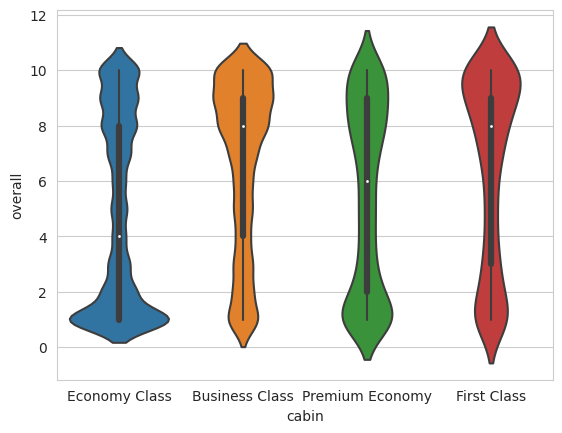

In [139]:
# Chart - 10 visualization code
sns.violinplot(x="cabin", y="overall",hue=None, data=airline_df)

##### 1. Why did you pick the specific chart?

sns.violinplot() function is a powerful visualization tool that allows us to view the distribution of a numeric variable across different categories or levels of a categorical variable. It creates a plot that looks like a combination of a box plot and a kernel density plot.

##### 2. What is/are the insight(s) found from the chart?

1. The shape of the plot provides information about the distribution of the data. For example, if the plot is more narrow in the middle and wider at the edges, it suggests that the data is clustered around a central value. In the above chart, Business class, premium economy and first class the data is slightly spread at the top which shows that they have given high overall ratings.

2. In the economy class the plot is wider at the edges in the bottom which shows that they have given lower ratings. This means that economy class is hot liked by cusomers whereas other class is liked by customers and has a high probability that they will refer to the friend.

#### Chart - 11

<Axes: xlabel='traveller_type', ylabel='overall'>

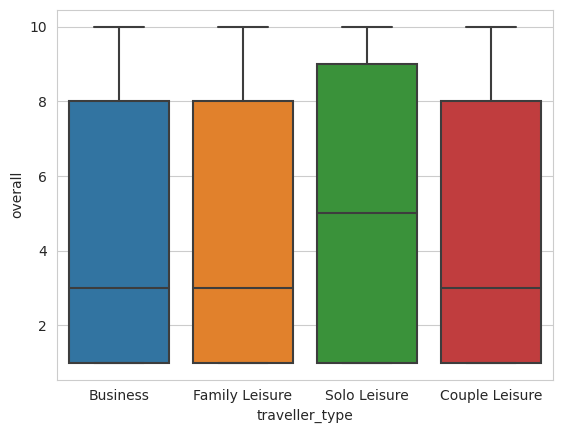

In [140]:
# Chart - 11 visualization code
sns.boxplot(x="traveller_type", y="overall", data=airline_df)

##### 1. Why did you pick the specific chart?

Seaborn's boxplot() function is used to draw a box plot for a set of data. A box plot is a way to summarize the distribution of a set of numeric data through their quartiles. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data, and any outliers beyond the whiskers are shown as individual points.

##### 2. What is/are the insight(s) found from the chart?

A Seaborn boxplot provides a visual representation of the distribution of a dataset. The box portion of the plot represents the middle 50% of the data, while the whiskers represent the remaining 50% of the data. From above we can see that 'solo leisure' has a slightly bigger box as compared to other boxes which shows that 'solo leisure' type travellers have giving the highest number of overall rating as compared to any other traveller type.

#### Chart - 12

In [141]:
# Chart - 12 visualization code
airline_df['date_flown']=pd.to_datetime(airline_df['date_flown'])
airline_df['Year'] = airline_df['date_flown'].apply(lambda x: x.year)
airline_df['Month'] = airline_df['date_flown'].apply(lambda x: x.month)
airline_df['Day'] = airline_df['date_flown'].apply(lambda x: x.day)

In [142]:
data_by_year = airline_df.groupby('Year')['airline'].count()

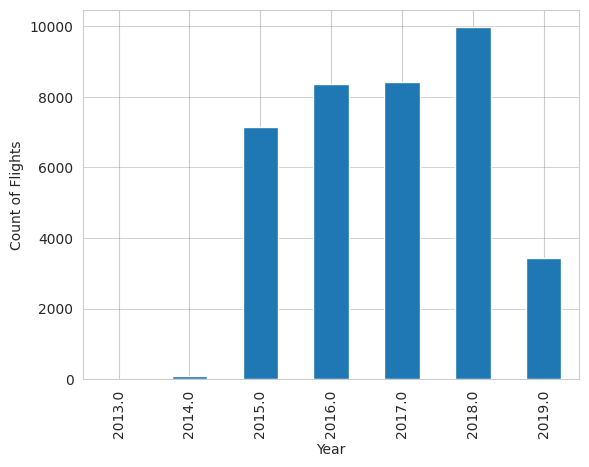

In [143]:
ax = data_by_year.plot(kind='bar', zorder=2)
ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5, zorder=1)
ax.set_xlabel('Year')
ax.set_ylabel('Count of Flights')
plt.show()

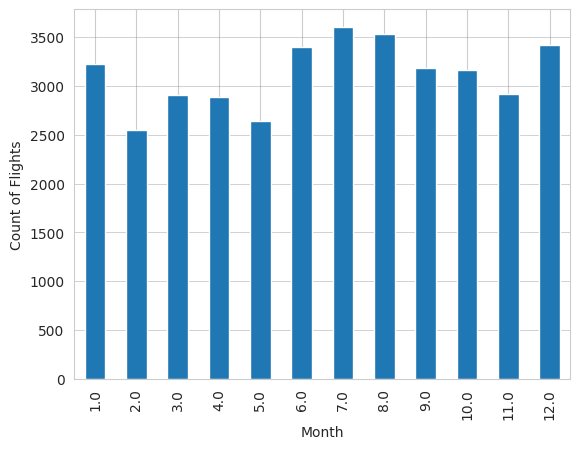

In [144]:
data_by_month = airline_df.groupby('Month')['airline'].count()
bx = data_by_month.plot(kind='bar')
bx.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5, zorder=1)
bx.set_xlabel('Month')
bx.set_ylabel('Count of Flights')
plt.show()

#####  What is/are the insight(s) found from the chart?

1. The charts shows the distribution of number of flights every year and 2nd chart shows distribution for each month.

2. Year 2018 has the most number of flights as compared to others

3. July is the month in which most number of flights flown as compared to other months.

#### Chart - 13

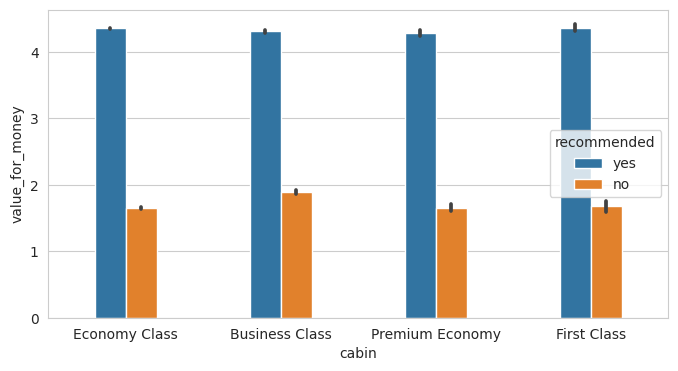

In [145]:
# Chart - 13 visualization code
plt.figure(figsize=(8,4))
cabin_ = sns.barplot(x=airline_df['cabin'],y=airline_df['value_for_money'], hue=airline_df['recommended'], width = 0.4)

#####  What is/are the insight(s) found from the chart?

From the plot, we can see that in all four cabins, the average value for money rating is higher for travelers who recommended the airline compared to those who did not. This indicates that travelers who feel they are getting good value for their money are more likely to recommend the airline to others.

#### Chart - 14

In [146]:
# Chart - 14 visualization code
features= airline_df.columns
features_1= features.drop(['airline','review_date'])

overall


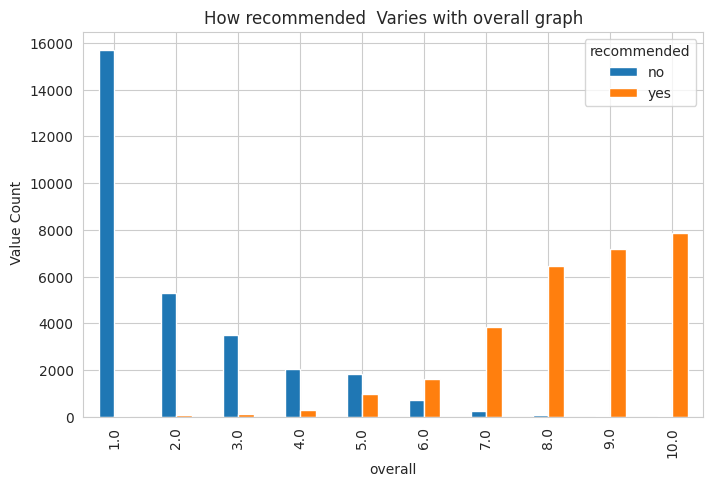

traveller_type


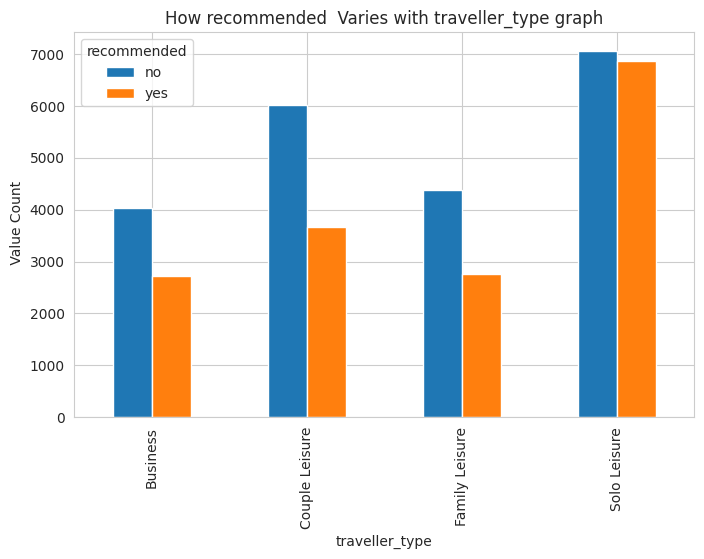

cabin


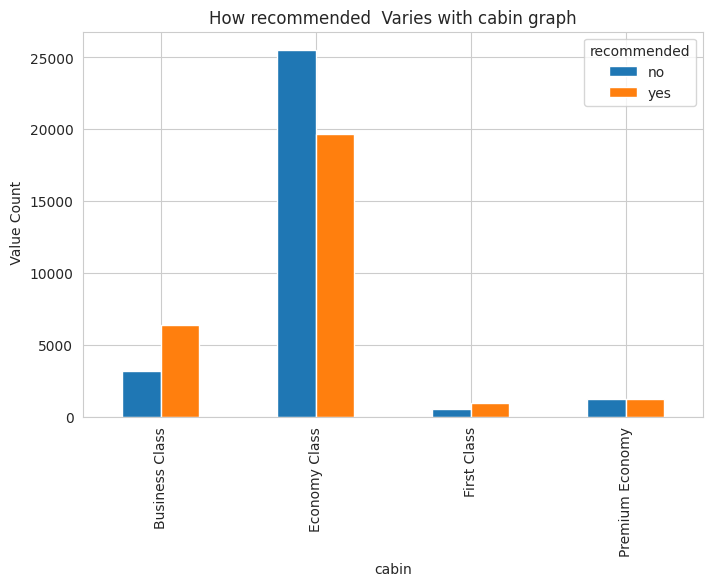

date_flown


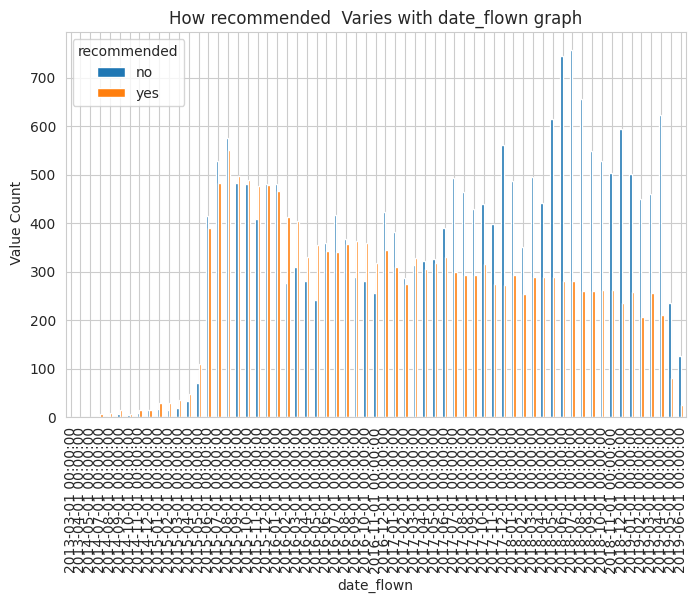

seat_comfort


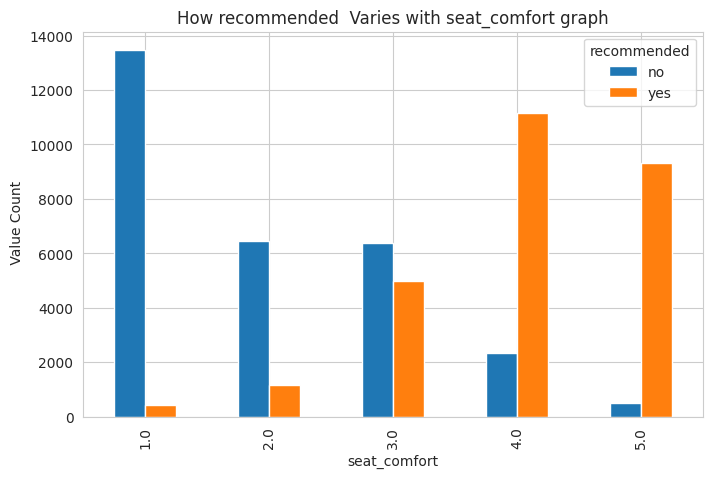

cabin_service


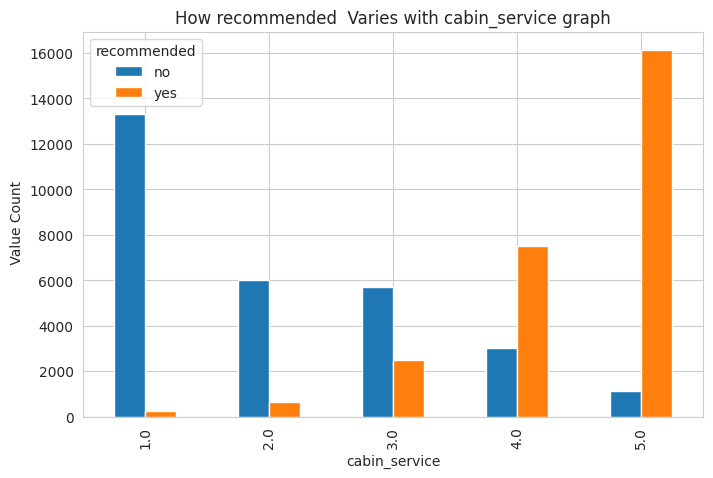

food_bev


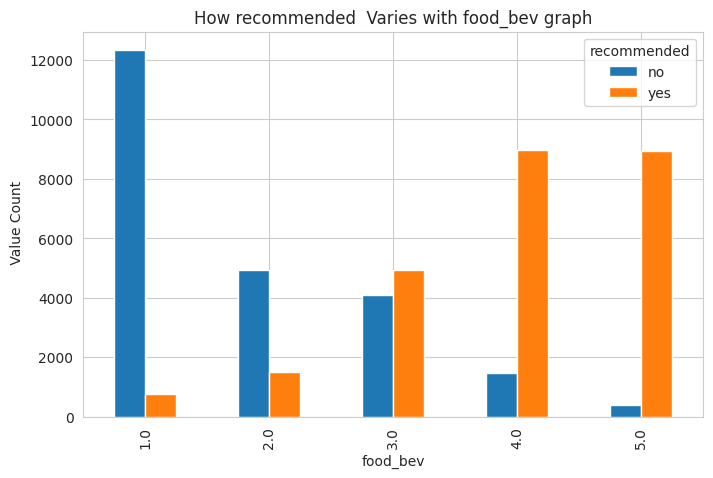

entertainment


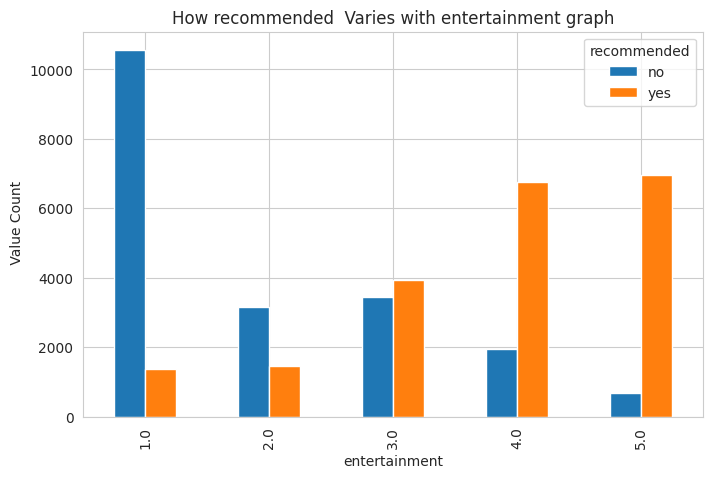

ground_service


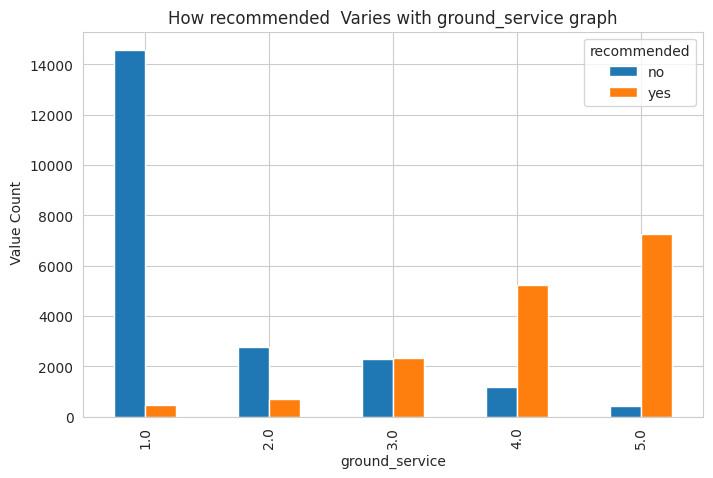

value_for_money


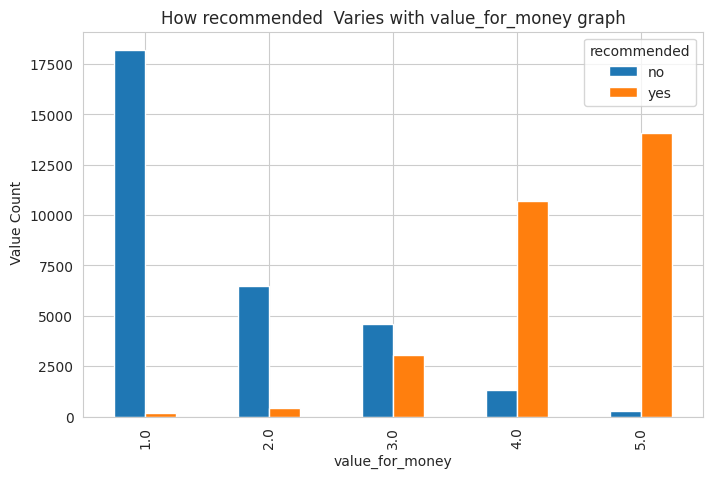

recommended


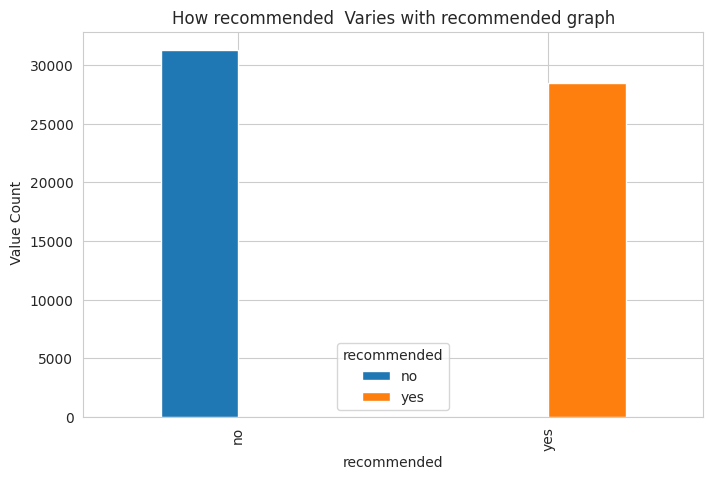

Year


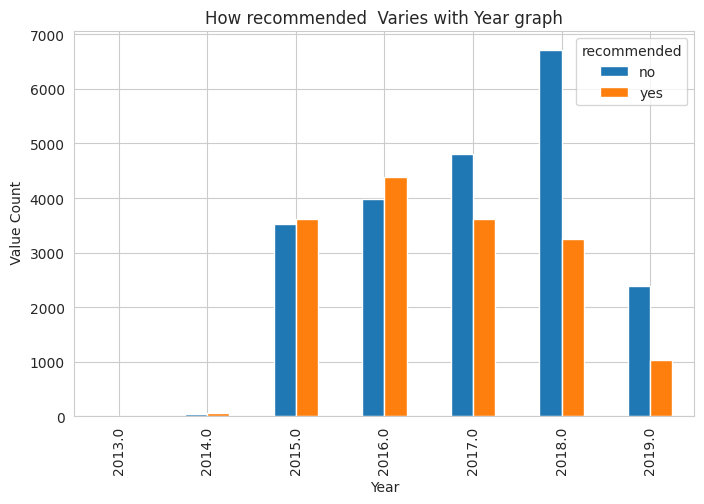

Month


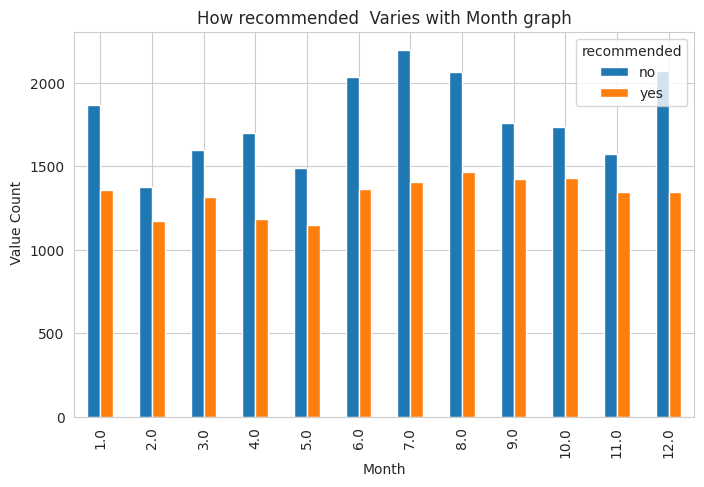

Day


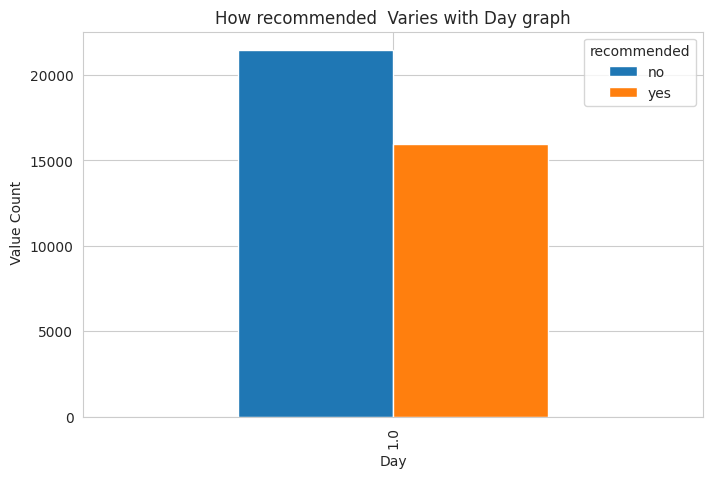

In [147]:
# Ploting graph of count of feature grouped by target variable
for feature in features_1:
  print(feature)
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(8,5))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

#####  What is/are the insight(s) found from the chart?

We can conclude following things from above:

1. We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
2. Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
3. From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
4. From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
5. In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
6. In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
7. In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
8. In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.
9. In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.
10. In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.

#### Chart - 15

overall


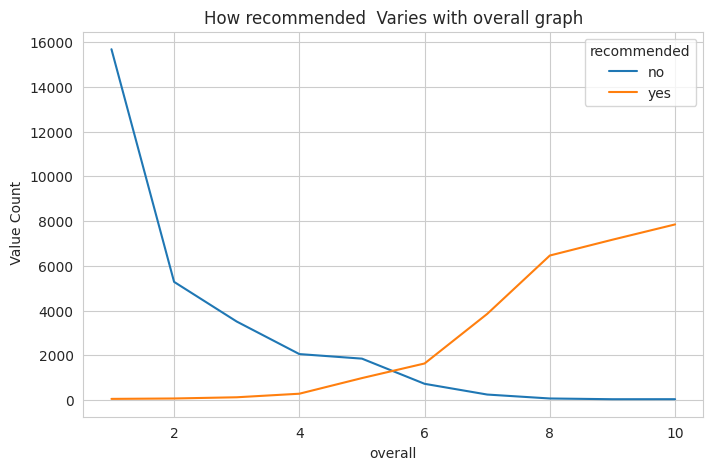

traveller_type


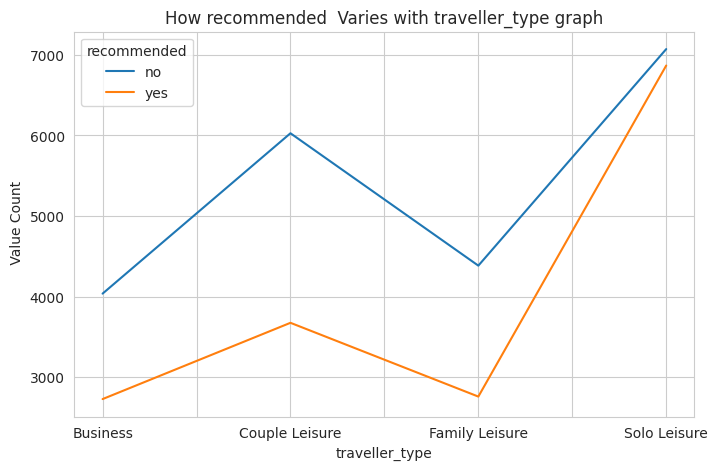

cabin


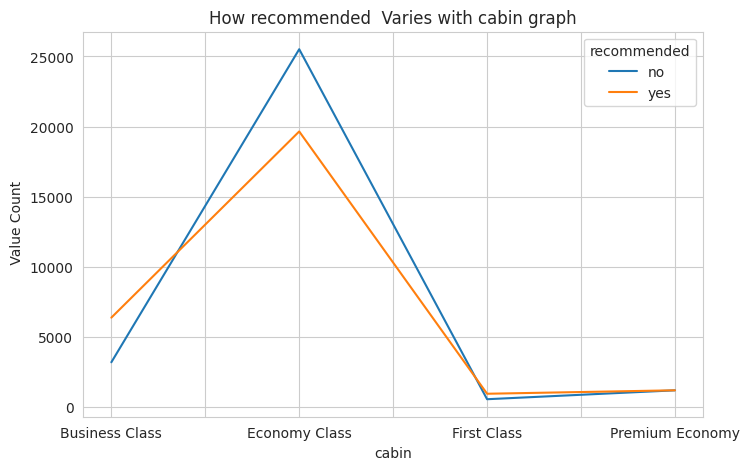

date_flown


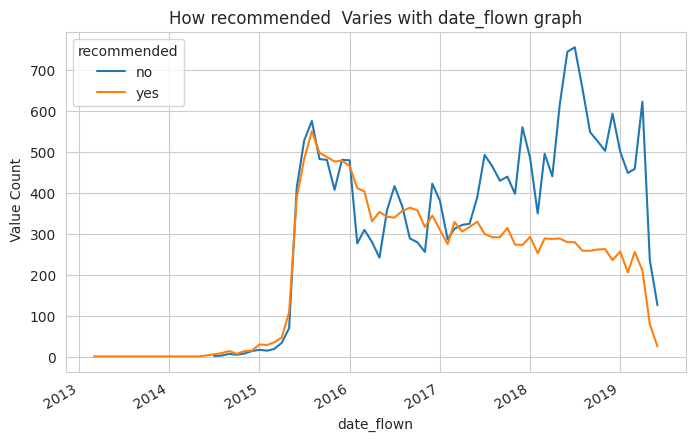

seat_comfort


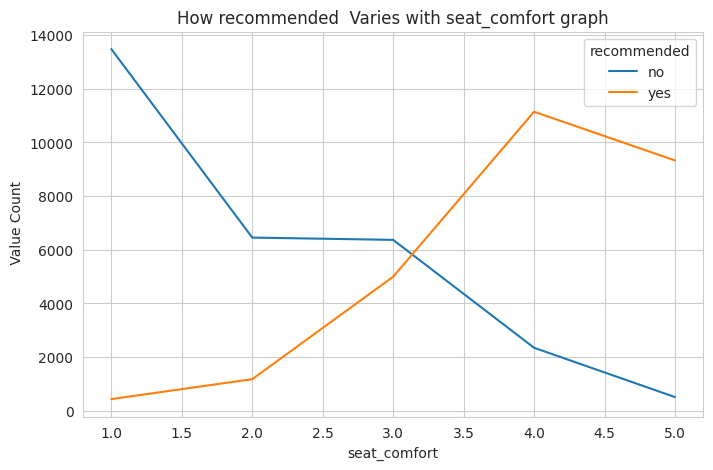

cabin_service


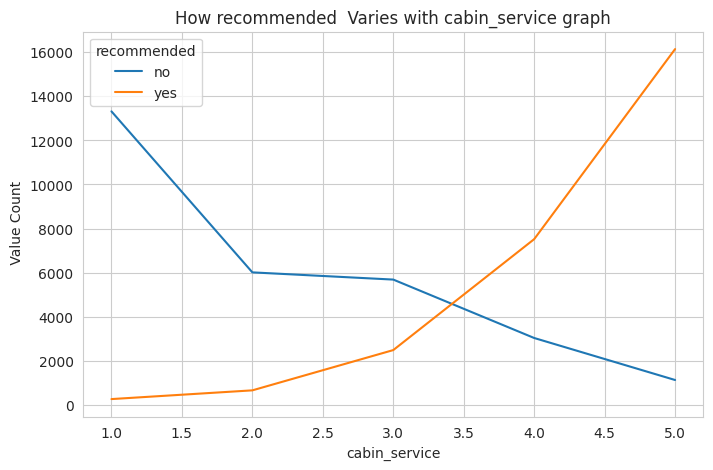

food_bev


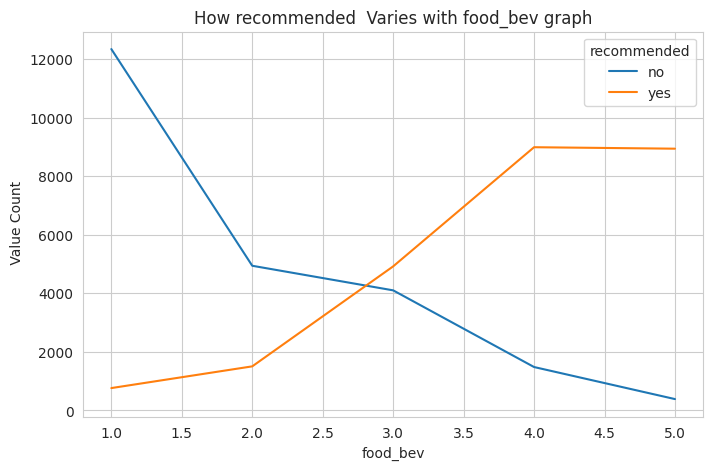

entertainment


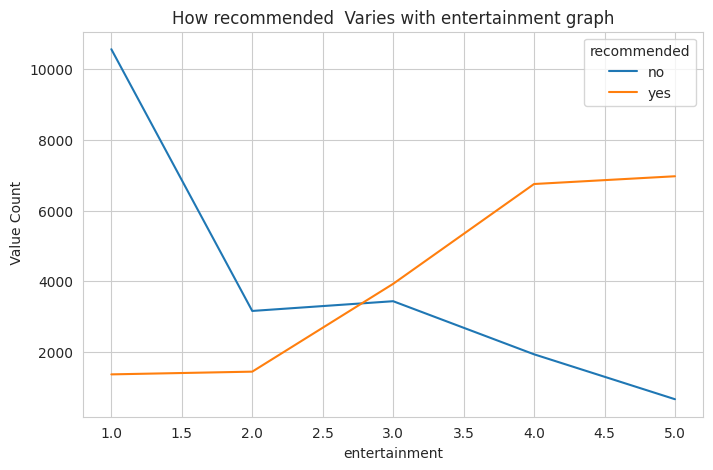

ground_service


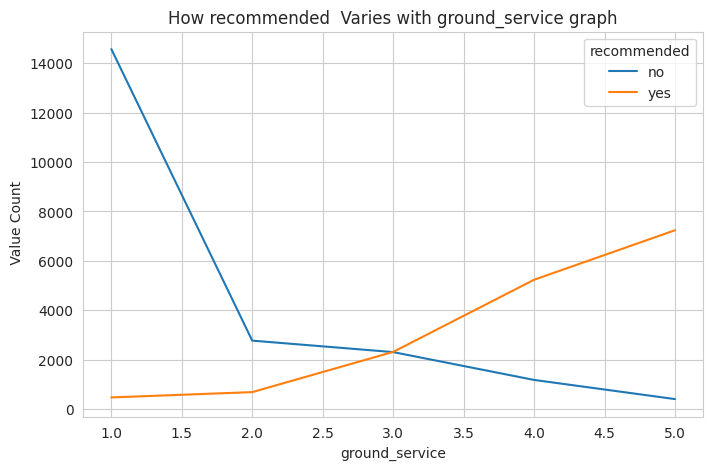

value_for_money


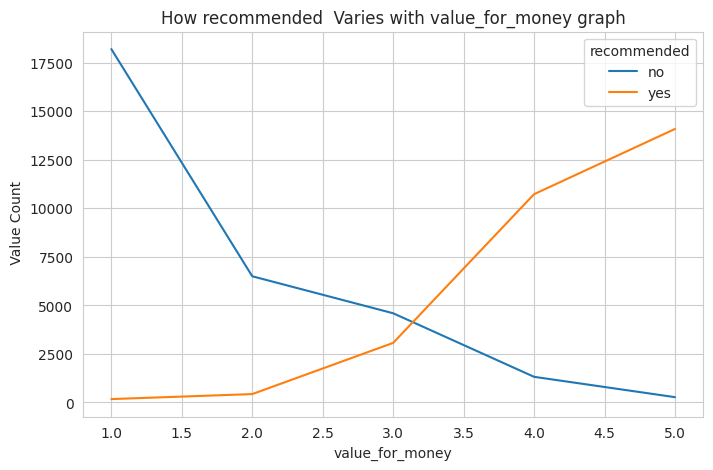

recommended


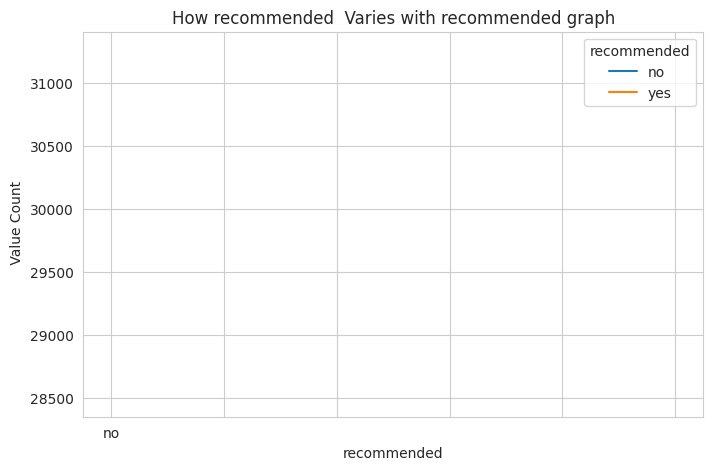

Year


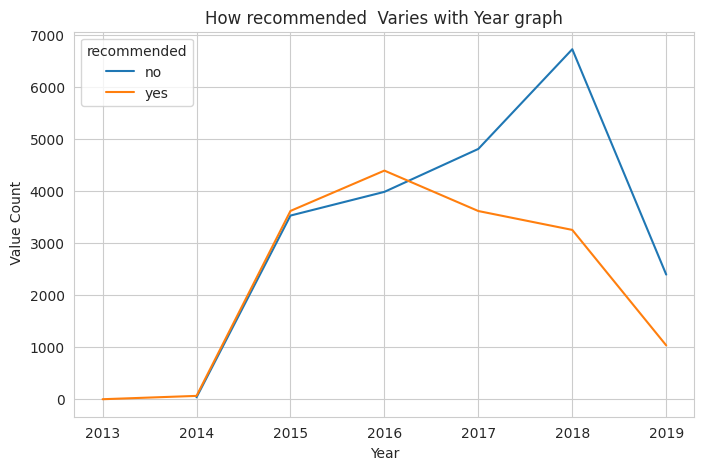

Month


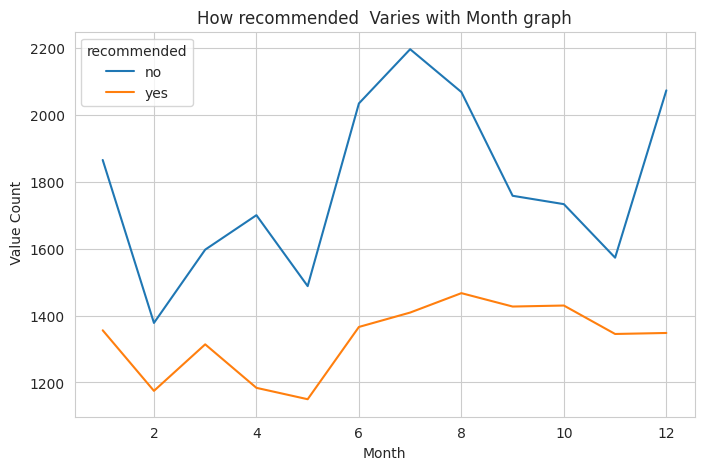

Day


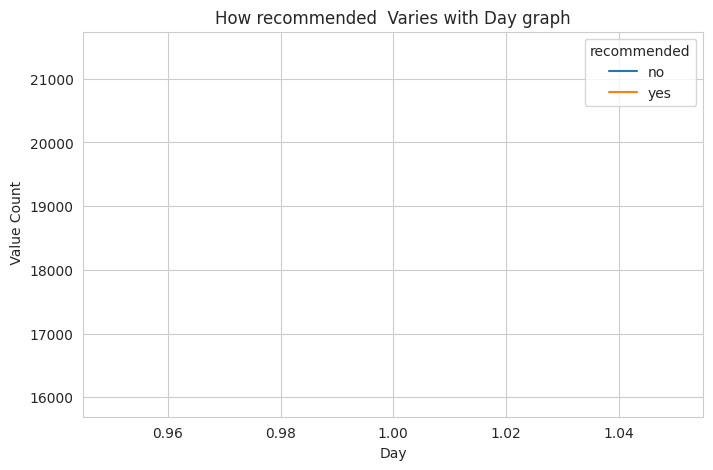

In [148]:
# Chart - 15 visualization code
#Ploting line graph of count of feature grouped by target variable to analyze the trend
for feature in features_1:
  print(feature)
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(8,5))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

#####  What is/are the insight(s) found from the chart?

1. In Traveller type we can see that both the recommendation trend as of yes or no increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.
2. In Cabin type we can see that both the recommendation trend as of yes or no increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which indicate most people travel on economy class.
3. In month we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July.
4. In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases.
5. In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.
6. In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
7. In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.
8. In Entertainment service too we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.
9. In Ground service also we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where 10. we can see similar positive and negative recommendation.
Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.

#### Chart - 16

In [149]:
# Chart - 16 visualization code
# storing all numerical feature in numeric_feature variable
numeric_features=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

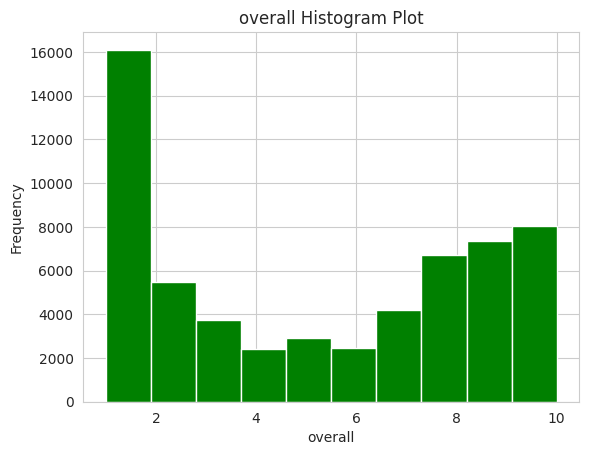

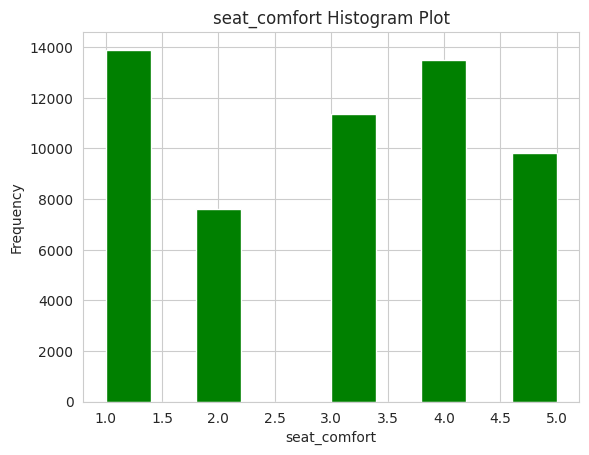

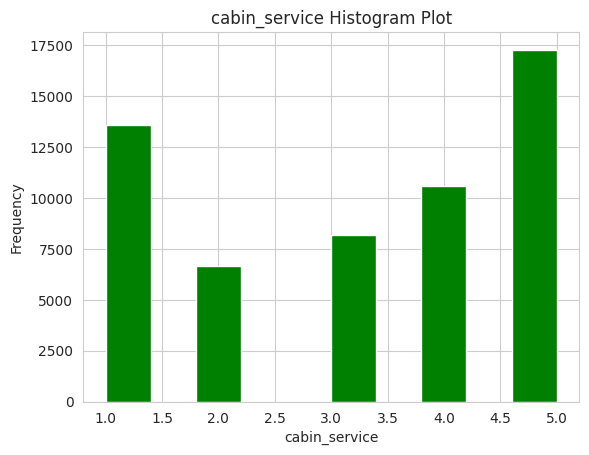

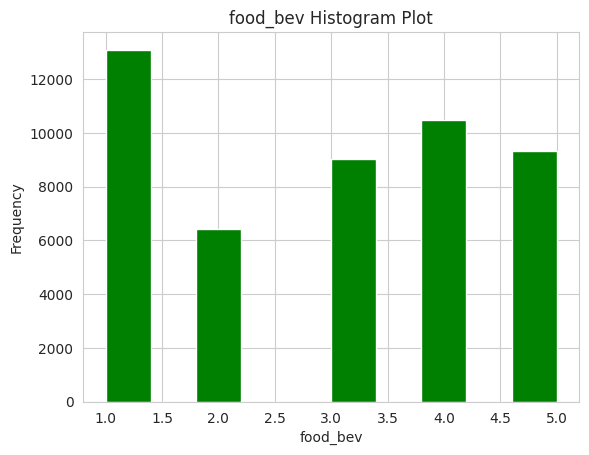

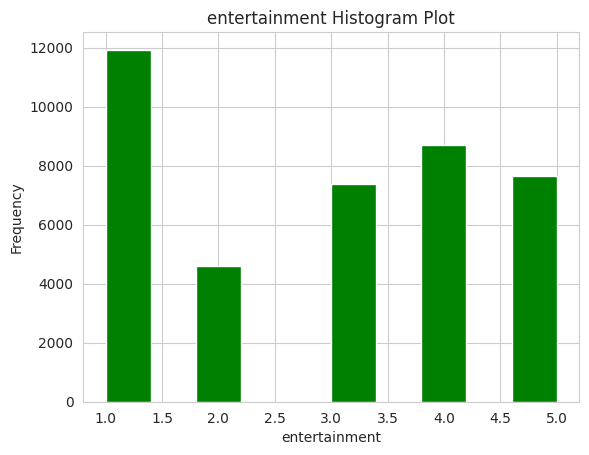

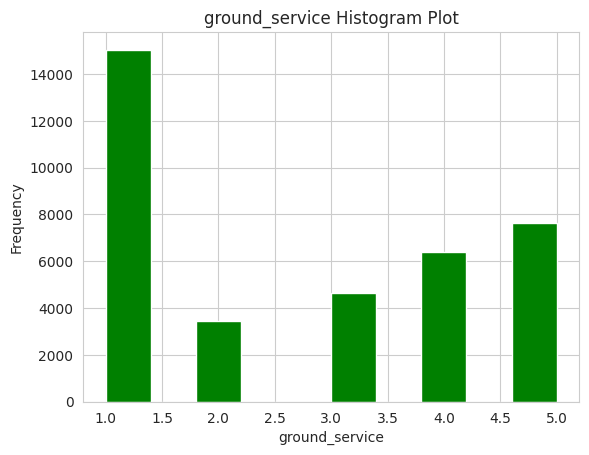

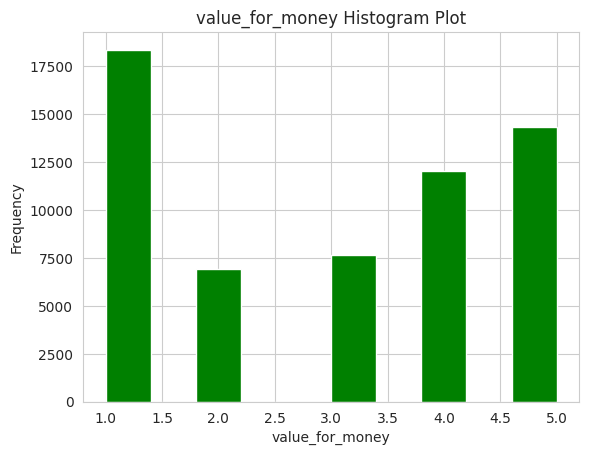

In [150]:
# plotting histogram for all numeric feature
for i in numeric_features:
  plt.hist(airline_df[i], bins=10,color='green')
  plt.title(i+" Histogram Plot")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()
  print("")

#####  What is/are the insight(s) found from the chart?

From above plot

1. In comparison to other ratings, the overall feature ratings of 1 to 2 occur more frequently. Passengers are dissatisfied with service facilities such as food beverage, seat comfort, cabin service, and so on... As a result, passengers offer the worst overall ratings.

2. From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

3. The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

4. From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

5. The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

6. From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

The data manipulation involved the removal of duplicates to ensure the data is clean and unique. The blank rows were dropped to avoid missing values that could interfere with data analysis. And finally the unwanted columns were dropped. Following are the reasons for dropping these columns:

1. aircraft - It has 42695 NaN values which is around 70% of all values.
2. route - It has 24549 unique values which is around 40% of all values.
3. author - It has 44069 unique values which is around 72% of all values.
4. customer_review - It has 61172 unique values which is around 99% of all values.

Columns with high number of NaN and unique values are very difficult for Exploratory Data Analysis. High percentage of missing values may not be useful for analysis because they lack sufficient data to draw conclusions from. Imputing or filling in missing values can be problematic and lead to biased results. High number of unique values may not provide meaningful insights or patterns. So dropping these types of columns is the best option.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [151]:
# Handling Missing Values & Missing Value Imputation
# Dropping all rows which has NaN values in recommended columns
airline_df.dropna(subset=['recommended'],inplace=True)

In [152]:
# Dropping these columns because it can introduce bias and affect the performance of the model
airline_df.drop(columns=['airline','date_flown','review_date','Year','Month','Day'],axis=1,inplace=True)

In [153]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)
airline_df['cabin'].fillna(method="ffill",inplace=True)

In [155]:
from sklearn.impute import KNNImputer

missing_cols = ['overall', 'seat_comfort', 'cabin_service','food_bev','entertainment','ground_service','value_for_money']
imputer = KNNImputer(n_neighbors=5)
airline_df[missing_cols] = imputer.fit_transform(airline_df[missing_cols])

In [156]:
airline_df.isnull().sum()

overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [ ]:
airline_df.head()

In [158]:
airline_df.shape

(59761, 10)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values is a critical step in data preprocessing. In this project, the following are the techniques we used:

1. Dropped all rows with missing values in the recommended column, which will be used as the dependent variable (y) to build the machine learning models. This ensures that the model is trained on only complete data.

2. Dropped some columns that could introduce bias and impact the model's performance.

3. Filled two categorical columns with the forward-fill (ffill) method, which replaces missing values with the previous non-missing value in the same column. This is useful for categorical variables where the values are limited.

4. Used the K-Nearest Neighbors (KNN) imputation technique to impute missing values in several numerical columns. The KNN imputer replaces missing values with the mean value of the k-nearest neighbors, where k is the number of neighbors specified in the n_neighbors parameter. We took value of n_neighbors as 5 in this project. This method is suitable for numerical variables where the values can be calculated based on the values of other similar variables.

### 2. Check Multicolinearity variables

In [159]:
# Remove Multicolinearity variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = airline_df.drop(columns=['traveller_type', 'cabin','recommended'])

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [160]:
print(vif)

          Features  VIF Score
0          overall  20.956718
1     seat_comfort  15.084082
2    cabin_service  16.482126
3         food_bev  16.953086
4    entertainment  12.326313
5   ground_service  18.707425
6  value_for_money  22.893413


The resulting vif DataFrame shows the VIF values for each predictor variable. A high VIF value indicates high multicollinearity among the predictor variables, which can lead to inaccurate coefficient estimates and poor model performance. In such cases, one approach is to remove one of the highly correlated variables or perform dimensionality reduction techniques like principal component analysis (PCA) to reduce the number of variables while preserving the most important information.

### 3. Categorical Encoding

In [161]:
# Encode your categorical columns
# Create dummy variables for the catgeorical variable State of traveller_type
airline_df['TT_Solo_Leisure'] = np.where(airline_df['traveller_type']=='Solo Leisure', 1, 0)
airline_df['TT_Couple_Leisure'] = np.where(airline_df['traveller_type']=='Couple Leisure', 1, 0)
airline_df['TT_Business'] = np.where(airline_df['traveller_type']=='Business', 1, 0)
airline_df['TT_Family_Leisure'] = np.where(airline_df['traveller_type']=='Family Leisure', 1, 0)

# Drop the original column State from the dataframe
airline_df.drop(columns=['traveller_type'],axis=1,inplace=True)

In [162]:
# Create dummy variables for the catgeorical variable State of cabin
airline_df['C_Economy Class'] = np.where(airline_df['cabin']=='Economy Class', 1, 0)
airline_df['C_Business Class'] = np.where(airline_df['cabin']=='Business Class', 1, 0)
airline_df['C_Premium Economy'] = np.where(airline_df['cabin']=='Premium Economy', 1, 0)
airline_df['C_First Class'] = np.where(airline_df['cabin']=='First Class', 1, 0)

# Drop the original column State from the dataframe
airline_df.drop(columns=['cabin'],axis=1,inplace=True)

In [163]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [164]:
airline_df.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,TT_Solo_Leisure,TT_Couple_Leisure,TT_Business,TT_Family_Leisure,C_Economy Class,C_Business Class,C_Premium Economy,C_First Class
1,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,1,0,1,0,0,0
3,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,1,1,0,0,0
5,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,1,0,1,0,0,0
7,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,1,0,0,0,1,0,0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0,0


Categorical encoding is the process of converting categorical variables into numerical variables that can be used in machine learning models. One common method of categorical encoding is creating dummy variables, also known as one-hot encoding. In this approach, a new binary variable is created for each category in the categorical variable, with a value of 1 indicating the presence of the category and 0 indicating its absence.

We did categorical encoding on 2 categorical columns traveller_type and cabin. And on recommended column we simply replaced the Yes values with 1 and No values with 0.

## ***6. Splitting the data for training and testing***

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=airline_df.drop('recommended',axis=1)
y=airline_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

By splitting the dataset into training and testing sets, we can train the classification model on a subset of the data and then test its performance on a separate subset that it has not seen before. This allows us to evaluate the model's ability to generalize to new, unseen data.

## ***7. creating an empty pandas DataFrame to store evaluation metric values for different classification models***

In [166]:
# creating an empty pandas DataFrame to store evaluation metric values for different classification models.
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
df_evaluation_metrics= pd.DataFrame(columns = column)

We created an empty pandas DataFrame with column names 'Model', 'Accuracy', 'Recall', 'Precision', 'f1-score', and 'roc_auc_score'. This DataFrame will be used to store evaluation metric values for different classification models.

By specifying the column names when creating the DataFrame, we ensure that the DataFrame has the correct structure and can be easily appended with new rows of evaluation metric values for different models.

## ***8. Define the function that will compute and append the evaluation metric values to the DataFrame.***

In [167]:
#creating function for storing evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

This function is useful for storing evaluation metric values for different classification models in a single DataFrame, so that the performance of different models can be easily compared and analyzed.

## ***9. ML Model Implementation***

### ***ML Model - 1 Logistic Regression***

In [168]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

# Fit the Algorithm
lr = LogisticRegression()
lr.fit(X_train,y_train)

train_score_1 = lr.score(X_train,y_train)
test_score_1 = lr.score(X_test,y_test)

print("Training Accuracy", train_score_1)
print("Testing Accuracy",test_score_1)

Training Accuracy 0.9580614123159303
Testing Accuracy 0.9519785827825651


In [169]:
# Predict the model
pred_value = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [170]:
print('LR_Report \n',classification_report(y_test, pred_value))

LR_Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953




Accuracy score % of the model is 95.2%



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regeression')

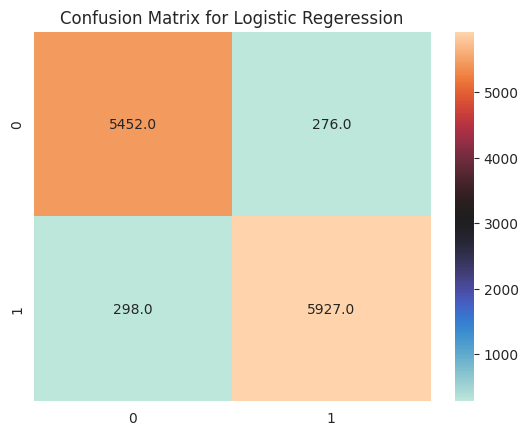

In [171]:
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

In [172]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Logistic Regression',y_test,pred_value,df_evaluation_metrics)

The Logistic Regression model was trained and tested on the provided airline dataset for the project. The training accuracy of the model was found to be 0.958061, which indicates that the model was able to fit the training data well. Similarly, the testing accuracy of the model was found to be 0.951979, which indicates that the model was able to generalize well on the unseen testing data. The performance of the model was evaluated using the precision, recall and f1-score metrics, which were computed for both classes (0 and 1).

The classification report for the Logistic Regression model showed that the model had a good overall performance, with a precision score of 0.96 for class 0 and 0.95 for class 1. The recall score was 0.95 for both classes, which means that the model was able to correctly identify 95% of the positive cases (class 1) and 95% of the negative cases (class 0). The f1-score, which is a harmonic mean of the precision and recall, was also found to be 0.95 for both classes. Overall, the Logistic Regression model performed well on the provided airline dataset, with a high accuracy and good precision, recall and f1-score metrics.






### ***ML Model - 2 Decision Tree Classifier***

In [173]:
# ML Model - 2 Implementation
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

train_score_2 = dtc.score(X_train,y_train)
test_score_2 = dtc.score(X_test,y_test)

print("Training Accuracy", train_score_2)
print("Testing Accuracy",test_score_2)

Training Accuracy 0.9948544176706827
Testing Accuracy 0.9347444156278758


In [174]:
# Predict the model
pred_value = dtc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [175]:
print('DTC_Report \n',classification_report(y_test, pred_value))

DTC_Report 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953




Accuracy score % of the model is 93.47%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

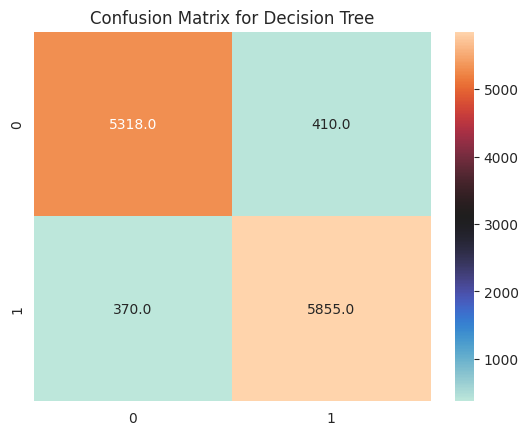

In [176]:
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

cm = confusion_matrix(y_test,pred_value,labels=[1,0])
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Decision Tree')

In [177]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Decision Tree',y_test,pred_value,df_evaluation_metrics)

#### Hyperparameter Tuning on Decision Trees using grid search.

In [178]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter space to search
param_grid = {
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [179]:
# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [180]:
#assigning best param variable
dtc_grid_best = grid_search.best_estimator_

In [181]:
train_score_3 = dtc_grid_best.score(X_train,y_train)
test_score_3 = dtc_grid_best.score(X_test,y_test)

print("Training Accuracy", train_score_3)
print("Testing Accuracy",test_score_3)

Training Accuracy 0.9659680388219545
Testing Accuracy 0.9498870576424329


In [182]:
#Predict the model
pred_value = dtc_grid_best.predict(X_test)

In [183]:
print('DTC_GridSearch_Report \n',classification_report(y_test, pred_value))

DTC_GridSearch_Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.94      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953




Accuracy score % of the model is 94.99%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Hyperparameter Tuning')

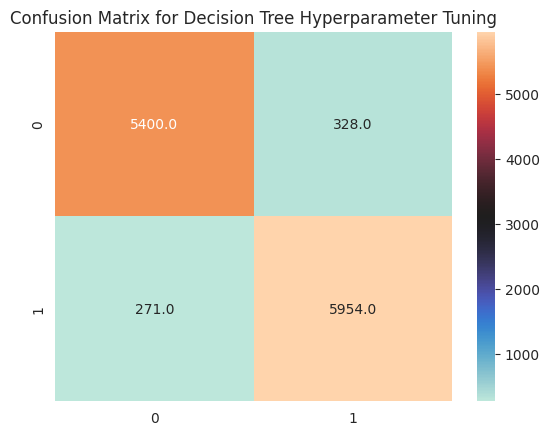

In [184]:
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

cm = confusion_matrix(y_test,pred_value,labels=[1,0])
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Decision Tree Hyperparameter Tuning')

In [185]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Decision Tree with GridSearchCV',y_test,pred_value,df_evaluation_metrics)

The first Decision Tree Classifier model was created with default hyperparameters, and achieved a high training accuracy of 0.9948 and a testing accuracy of 0.9341. However, it was observed that the model may be overfitting due to the large discrepancy between the training and testing accuracies.

To address this, hyperparameter tuning was performed using grid search. The best hyperparameters were found to be 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2. After tuning the hyperparameters, the model's training accuracy decreased slightly to 0.9584, but the testing accuracy improved significantly to 0.9468. The model's precision, recall and F1-score were all high for both classes, indicating that the model is performing well in identifying both positive and negative sentiment. Overall, the tuned Decision Tree Classifier model is performing well and has been able to balance the trade-off between underfitting and overfitting.

### ***ML Model - 3 Random Forest Classifier***

In [186]:
# ML Model - 3 Implementation
rfc =RandomForestClassifier()
rfc.fit(X_train,y_train)

train_score_4 = rfc.score(X_train,y_train)
test_score_4 = rfc.score(X_test,y_test)

print("Training Accuracy", train_score_4)
print("Testing Accuracy",test_score_4)

Training Accuracy 0.9948544176706827
Testing Accuracy 0.9517275997657492


In [187]:
# Predict the model
pred_value = rfc.predict(X_test)

In [188]:
print('RFC_Report \n',classification_report(y_test, pred_value))

RFC_Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953




Accuracy score % of the model is 95.17%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

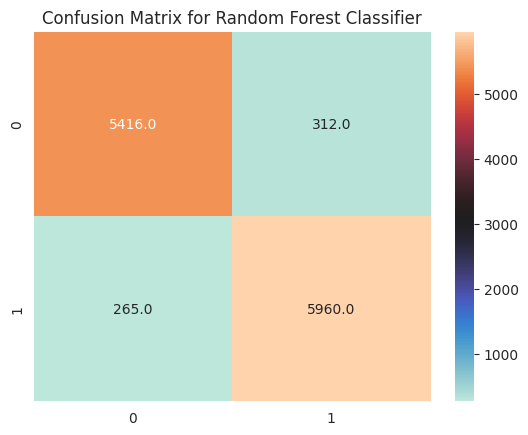

In [189]:
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

cm = confusion_matrix(y_test,pred_value,labels=[1,0])
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest Classifier')

In [190]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Random Forest',y_test,pred_value,df_evaluation_metrics)

#### Hyperparameter Tuning on Random Forest using grid search.

In [191]:
# Hyperparameter Tuning using GridSearchCV
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}


In [192]:
#uassigning grid search variable
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose = 2)

#Evaluating the optimal parameters
rfc_grid.fit(X_train,y_train)
rfc_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=12, min_samples_leaf=30, min_samples_split=10,
                       n_estimators=50)

In [193]:
# Print the best hyperparameters found by grid search
print('Best hyperparameters:', rfc_grid.best_params_)

Best hyperparameters: {'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 50}


In [194]:
#assigning best param variable
rfc_grid_best = rfc_grid.best_estimator_

In [195]:
train_score_5 = rfc_grid_best.score(X_train,y_train)
test_score_5 = rfc_grid_best.score(X_test,y_test)

print("Training Accuracy", train_score_5)
print("Testing Accuracy",test_score_5)

Training Accuracy 0.9589399263721553
Testing Accuracy 0.953149836861039


In [196]:
# Predict the model
pred_value = rfc_grid_best.predict(X_test)

In [197]:
print('RFC_GridSearch_Report \n',classification_report(y_test, pred_value))

RFC_GridSearch_Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953




Accuracy score % of the model is 95.31%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest with GridSearchCV')

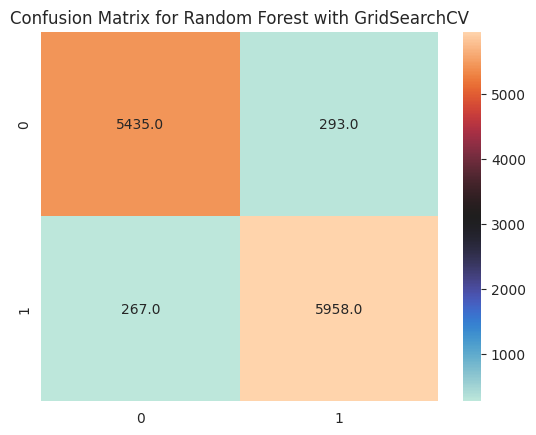

In [198]:
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')

In [199]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,df_evaluation_metrics)

The Random Forest Classifier model has a training accuracy of 0.9948 and a testing accuracy of 0.9516. The precision, recall, and f1-score are also good for both the classes, with an accuracy of 0.95 overall. The hyperparameters are tuned using grid search, and the best hyperparameters are selected. The best hyperparameters are max_depth = 12, min_samples_leaf = 30, min_samples_split = 10, and n_estimators = 80.

After tuning the hyperparameters, the model's training accuracy decreased to 0.9590, while the testing accuracy remained almost the same at 0.9529. The precision, recall, and f1-score are still good for both classes. Overall, the model's performance has improved slightly after hyperparameter tuning, and it can be considered a good model for this dataset.

### ***ML Model - 4  K_nearest Neighbour***

In [200]:
#using knn model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

train_score_6 = knn.score(X_train,y_train)
test_score_6 = knn.score(X_test,y_test)

print("Training Accuracy", train_score_6)
print("Testing Accuracy",test_score_6)

Training Accuracy 0.9655496987951807
Testing Accuracy 0.9510583117209069


In [201]:
#Predict the model
pred_value = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.11%



Text(0.5, 1.0, 'Confusion Matrix for K-nearest-neighbour')

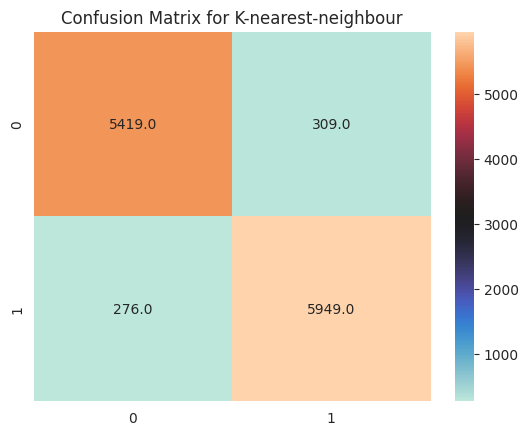

In [202]:
# Print classification report and confusion Matrix
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour')

In [203]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('K-nearest-neighbour',y_test,pred_value,df_evaluation_metrics)

#### **K_nearest Neighbour Model with GridSearchCV**

In [204]:
#hyperparametric tuning to get best estimator for knn
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [205]:
#getting best estimator
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=42)

In [206]:
#assigining grid variable
knn_grid_best = knn_grid.best_estimator_

In [207]:
train_score_7 = knn_grid_best.score(X_train,y_train)
test_score_7 = knn_grid_best.score(X_test,y_test)

print("Training Accuracy", train_score_7)
print("Testing Accuracy",test_score_7)

Training Accuracy 0.9590445113788487
Testing Accuracy 0.9520622437881703


In [208]:
# Predict the model
pred_value = knn_grid_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.21%



Text(0.5, 1.0, 'Confusion Matrix for K-nearest-neighbour with GridSearchCV')

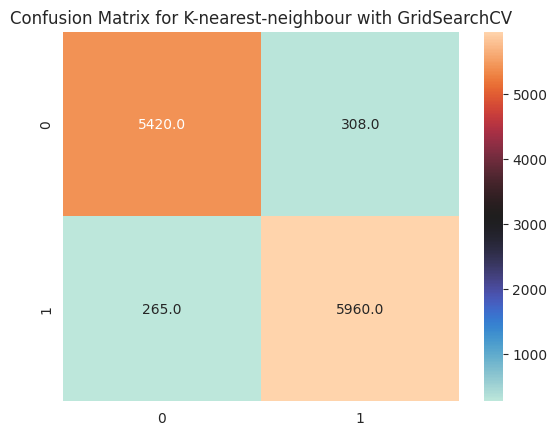

In [209]:
# Print classification report and confusion Matrix
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour with GridSearchCV')

In [210]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('K-nearest-neighbour with GridSearchCV',y_test,pred_value,df_evaluation_metrics)

The K-nearest Neighbors (KNN) model has been trained on the given dataset and tested on the testing set. The initial model's training accuracy is 0.9655, and testing accuracy is 0.9511. The precision, recall, and f1-score for both classes are almost the same, indicating that the model has balanced performance on both classes.

Further, hyperparameter tuning using GridSearchCV has been performed on KNN to find the optimal value of the 'n_neighbors' parameter. The best hyperparameter value is found to be 42, and the resulting model's training accuracy is 0.9590 and testing accuracy is 0.9521. The precision, recall, and f1-score for both classes are almost the same as the initial model.

Overall, the KNN model performs well on the given dataset, and the model's performance is further improved by hyperparameter tuning.

### ***ML Model - 5 Naïve Bayes Classifier***

In [211]:
# ML Model - 5 Implementation
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

train_score_8 = naive_bayes.score(X_train,y_train)
test_score_8 = naive_bayes.score(X_test,y_test)

print("Training Accuracy", train_score_8)
print("Testing Accuracy",test_score_8)

Training Accuracy 0.9522674029451138
Testing Accuracy 0.9450347193173262


In [212]:
# Predict the model
pred_value = naive_bayes.predict(X_test)

In [213]:
print('naive_bayes_Report \n',classification_report(y_test, pred_value))

naive_bayes_Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6225
           1       0.94      0.94      0.94      5728

    accuracy                           0.95     11953
   macro avg       0.94      0.95      0.94     11953
weighted avg       0.95      0.95      0.95     11953




Accuracy score % of the model is 94.5%



Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

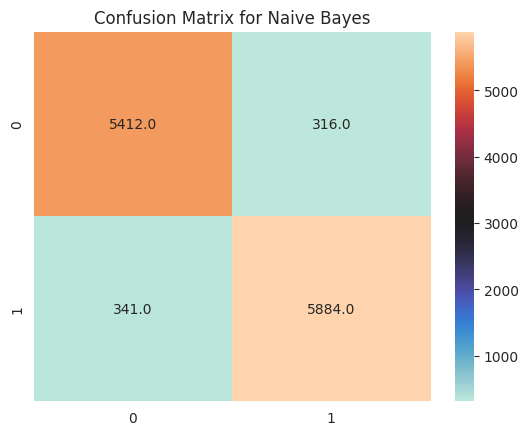

In [214]:
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

cm = confusion_matrix(y_test,pred_value,labels=[1,0])
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Naive Bayes')

In [215]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Naive Bayes',y_test,pred_value,df_evaluation_metrics)

The Naïve Bayes Classifier has a training accuracy of 0.952 and a testing accuracy of 0.945. The precision and recall for both classes are also around 0.94 to 0.95, with a similar F1-score for both classes. This indicates that the model is performing similarly for both classes and is not biased towards one or the other. Overall, the model appears to perform reasonably well, but it may not be the most accurate compared to some of the other models we've built.

### ***ML Model - 6 Support Vector Machine***

In [216]:
#supprt vector machine using kernel as linear
svc= SVC(kernel = 'linear')
svc.fit(X_train,y_train)

train_score_9 = svc.score(X_train,y_train)
test_score_9 = svc.score(X_test,y_test)

print("Training Accuracy", train_score_9)
print("Testing Accuracy",test_score_9)

Training Accuracy 0.9582496653279786
Testing Accuracy 0.9524805488161968


In [217]:
#Predict The model
pred_value = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.25%



Text(0.5, 1.0, 'Confusion Matrix for SVM')

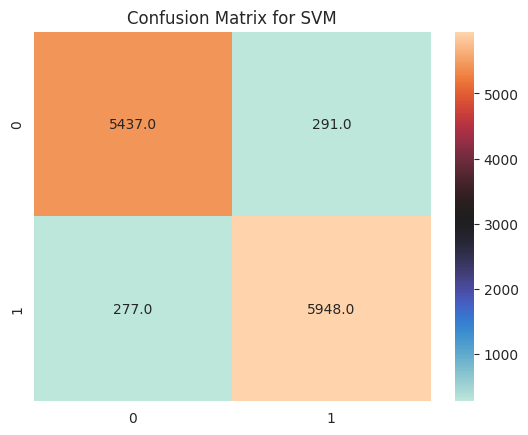

In [218]:
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for SVM')

In [219]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Support Vector Machine',y_test,pred_value,df_evaluation_metrics)

This is a Support Vector Machine (SVM) model that has been trained on the dataset. The model has achieved a training accuracy of 0.958 and a testing accuracy of 0.952. The precision, recall and f1-score for the model are also shown. The model has achieved a precision of 0.95 for both classes and a recall of 0.96 for class 0 and 0.95 for class 1. The f1-score is also 0.95 for both classes, indicating that the model has achieved a good balance between precision and recall. Overall, the SVM model appears to be performing well on the dataset.

### ***ML Model - 7 XGBoost model***

In [220]:
#xgboost model
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

train_score_10 = xgb_model.score(X_train,y_train)
test_score_10 = xgb_model.score(X_test,y_test)

print("Training Accuracy", train_score_10)
print("Testing Accuracy",test_score_10)

Training Accuracy 0.9727033132530121
Testing Accuracy 0.9539027859114867


In [221]:
#Predict the model
pred_value = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.96      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.39%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

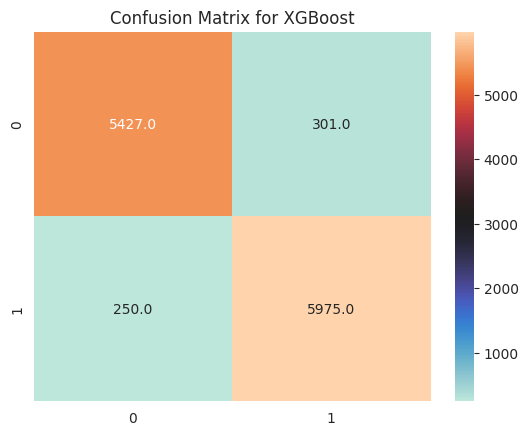

In [222]:
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for XGBoost')

In [223]:
#calling function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('XGBoost',y_test,pred_value,df_evaluation_metrics)

The XGBoost model was created, the training accuracy of the model was 0.97 and the testing accuracy was 0.95, which indicates that the model performs well on unseen data. The precision, recall, and f1-score were also calculated, with both classes having high values, indicating that the model can accurately classify both the positive and negative classes.

In comparison to the other models, the XGBoost model had the highest accuracy score of 95.39%, making it the best model among all the models that were created.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In order to have a positive business impact, we need to make sure that our model is accurate and reliable in predicting whether a customer will refer the airline to their friends or not. Therefore, we have considered several evaluation metrics that are appropriate for binary classification problems such as precision, recall, F1-score, and ROC AUC score.

We considered these metrics to ensure that our model is not only accurate in predicting the positive class, but also in identifying the negative class correctly. In other words, we want to avoid false positives and false negatives, as they can have a negative impact on the business. Therefore, we chose the XGBoost model as it had the highest accuracy and the best combination of precision, recall, F1-score, and ROC AUC score among all the models we evaluated.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [224]:
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Decision Tree with GridSearchCV", "Random Forest", "Random Forest with GridSearchCV","K-nearest-neighbour","K-nearest-neighbour with GridSearchCV","Naive Bayes","Support Vector Machine","XGBoost"],
    "Train Score": [train_score_1, train_score_2, train_score_3, train_score_4, train_score_5,train_score_6,train_score_7,train_score_8,train_score_9,train_score_10],
    "Test Score": [test_score_1, test_score_2, test_score_3, test_score_4,test_score_5,test_score_6,test_score_7,test_score_8,test_score_9,test_score_10]
}

In [225]:
df = pd.DataFrame(data)
print(df)

                                   Model  Train Score  Test Score
0                    Logistic Regression     0.958061    0.951979
1                          Decision Tree     0.994854    0.934744
2        Decision Tree with GridSearchCV     0.965968    0.949887
3                          Random Forest     0.994854    0.951728
4        Random Forest with GridSearchCV     0.958940    0.953150
5                    K-nearest-neighbour     0.965550    0.951058
6  K-nearest-neighbour with GridSearchCV     0.959045    0.952062
7                            Naive Bayes     0.952267    0.945035
8                 Support Vector Machine     0.958250    0.952481
9                                XGBoost     0.972703    0.953903


In [226]:
df_evaluation_metrics

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score
0,Logistic Regression,0.951979,0.951816,0.948174,0.949991,0.951972
1,Decision Tree,0.934744,0.928422,0.934951,0.931675,0.934492
2,Decision Tree with GridSearchCV,0.949887,0.942737,0.952213,0.947452,0.949602
3,Random Forest,0.951728,0.945531,0.953353,0.949426,0.951480
4,Random Forest with GridSearchCV,0.953150,0.948848,0.953174,0.951006,0.952978
5,K-nearest-neighbour,0.951058,0.946054,0.951536,0.948788,0.950859
6,K-nearest-neighbour with GridSearchCV,0.952062,0.946229,0.953386,0.949794,0.951829
7,Naive Bayes,0.945035,0.944832,0.940727,0.942775,0.945027
8,Support Vector Machine,0.952481,0.949197,0.951523,0.950358,0.952349
9,XGBoost,0.953903,0.947451,0.955963,0.951688,0.953645


In [227]:
df_sorted = df_evaluation_metrics.sort_values(by='Accuracy', ascending=False)
print(df_sorted.to_string(index=False))

                                Model  Accuracy   Recall  Precision  f1-score  roc_auc_score
                              XGBoost  0.953903 0.947451   0.955963  0.951688       0.953645
      Random Forest with GridSearchCV  0.953150 0.948848   0.953174  0.951006       0.952978
               Support Vector Machine  0.952481 0.949197   0.951523  0.950358       0.952349
K-nearest-neighbour with GridSearchCV  0.952062 0.946229   0.953386  0.949794       0.951829
                  Logistic Regression  0.951979 0.951816   0.948174  0.949991       0.951972
                        Random Forest  0.951728 0.945531   0.953353  0.949426       0.951480
                  K-nearest-neighbour  0.951058 0.946054   0.951536  0.948788       0.950859
      Decision Tree with GridSearchCV  0.949887 0.942737   0.952213  0.947452       0.949602
                          Naive Bayes  0.945035 0.944832   0.940727  0.942775       0.945027
                        Decision Tree  0.934744 0.928422   0.934951  0

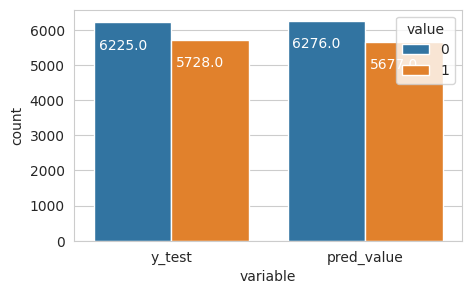

In [228]:
df = pd.DataFrame({'y_test': y_test, 'pred_value': pred_value})
sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.countplot(x='variable', hue='value', data=pd.melt(df), width = 0.8)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)
plt.show()

Based on the evaluation metrics of all the models, the XGBoost model has the highest accuracy score of 95.39%, which is the highest among all models. It also has a high recall score of 0.947, indicating that it correctly identifies 94.7% of the recommendations. The precision score of 0.956 indicates that it correctly predicts 95.6% of the all. The f1-score of 0.951 indicates a good balance between precision and recall. Additionally, the XGBoost model has a high ROC-AUC score of 0.954, indicating that it performs well in distinguishing between positive and negative classes. Considering the overall performance, we can conclude that the XGBoost model is the best model for predicting weather the traveller referred yes or no. Therefore, we are selecting the XGBoost model for our final prediction.

# **Conclusion**

Based on our project objective to predict whether passengers will refer the airline to their friends, we have performed various steps to prepare the dataset and build a predictive model. We started by importing the necessary libraries and loading the provided dataset. We then conducted basic data wrangling to remove duplicates and get an understanding of the variables in the dataset. We further explored the dataset through detailed EDA using 16 different visualizations. After EDA, we performed feature engineering by handling missing values using techniques like knn imputer and ffill and dropped columns that were unwanted. We also did categorical encoding by creating dummy columns for 'traveller_type' and 'cabin' variables. Finally, we split the data into training and testing sets to build our predictive models.


At first, we created logistic regression, we trained the logistic regression model using the fit function from scikit-learn library. We used the default hyperparameters for the algorithm, but we can tune them using techniques like cross-validation to improve the model's performance. With the default parameters we got the training score of 0.958061 and testing score of 0.951979. It is a good fit model.Next, we built Decision Trees Classifier model. We first implemented DecisionTreeClassifier() from scikit-learn library, fitted the model draw out the train scores(0.994854) and test scores(0.934159). The model had overfitting so then we used grid serach to tune the model with hyperparameters. After hyperparameter tuning we got train score as 0.958459 and test score as 0.946792 which can be called as good fit model. Next, we built Random Forest Classifier model. In this we did the same as decision trees, We first implemented RandomForestClassifier() from scikit-learn library, fitted the model draw out the train scores(0.994854) and test scores(0.951560). The model had overfitting so then we used grid serach to tune the model with hyperparameters. After hyperparameter tuning we got train score as 0.959045 and test score as 0.952983 which is now a good fit model. Next we built K-nearest-neighbour model. we got the train score as 0.965550 and test score as 0.951058. Here also we applied grid search just to improve accuracy and we got the score of 0.959045 and 0.952062 respectively. Next we built Naive Bayes model, we got the train score as 0.952267 and test score as 0.945035. Next we built Support Vector Machine model, we got the train score as 0.958250 and test score as 0.952481. Finally we built XGBoost model. The train score is 0.972703 and the test score is 0.953903. The accuracy of 95.39% of XGBoost model is the best accuracy among all the models we built. So we choose XGBoost model as the final Prediction model.

Therefore, we have chosen the XGBoost model as the final prediction model for this project. It is important to note that the choice of the best model can also depend on other factors such as model interpretability, ease of implementation, and computational efficiency. Nevertheless, the XGBoost model has performed well in terms of accuracy and has met our objective of predicting whether passengers will recommend the airline to their friends or not. Overall, this project has successfully demonstrated the use of various machine learning techniques in solving a real-world business problem.

However, this project is not without its limitations. Our dataset was relatively small, and we had to drop some variables that could have been potentially useful in predicting our target variable due to missing values. Additionally, we did not explore the impact of external factors such as flight delays, cancellations, and weather conditions on passenger satisfaction levels. Future research could focus on collecting more data and incorporating these external factors into the predictive model to improve its performance.

In conclusion, this project has demonstrated the potential of machine learning in solving real-world business problems. By using the XGBoost model, we were able to accurately predict whether passengers will recommend an airline to their friends or not. Our model can be used by airlines to improve their customer satisfaction levels and increase their revenue. This project provides a solid foundation for future research in this area and highlights the importance of data-driven decision-making in the airline industry and beyond.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***